<a href="https://colab.research.google.com/github/NganTran-0017/HIDS/blob/main/HIDS_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Update remove duplicate between train and test --> create independent test
check why test set after removing the intersection (aka independent test) has no frequent record? --> no, set(independent test) has fewer records than independent test.
So the previous clean_data method removes duplication and overlap instances, while the new method (remove_duplicate) only removes overlap instance


!rm *.txt
! rm *.int

In [ ]:
#@title Specify parameters before running


SZ =  1#@param {type:"number"}         # Indicate a fraction number to sample train set when it's too big. Located in Data Partition

SEQ_WINDOW =  25#@param {type:"integer"} # Indicate the window length to parse the sequence into. Used in Data Parsing section

BATCH_SZ =  32#@param {type:"integer"} # Indicate the window length to parse the sequence into. Used in Data Parsing section

EPOCHS =  2#@param {type:"integer"} # Indicate the window length to parse the sequence into. Used in Data Parsing section

# Indicate to clean data or not. Used in Data Cleaning section
CLEAN = True #@param {type:"boolean"}
DATA = "Xlock" #@param {type:"string"}


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, roc_curve, auc, recall_score, precision_score,plot_confusion_matrix
from sklearn.model_selection import train_test_split
%matplotlib inline

#import nltk
#nltk.download("popular")
## Tokenizing syscall sequences into n-grams of 6
#from nltk.tokenize import word_tokenize
#from nltk import ngrams

## **Preparing data for data partition**
- Combine data and labels together. 
- Combine data from each class together --> Create a pool of data 
- Split data pool into train and test

## **Cleaning**
- Remove dupplication between train and test

- 2 directions for Testing set:
  *  Test with clean data: Remove overlap and dupplication between Normal and Intrusion in Test data
  *  Test with Unclean data: Leave Test data as is

- 2 directions Training set:
  *   Clean model: Remove overlap and dupplication between Normal and Intrusion in Train data
  *   Unclean model: Leave Train data as is



#**Load partitioned data from here**

In [ ]:
from google.colab import files
files.upload()

Saving test_clean.csv to test_clean.csv
Saving test_unclean.csv to test_unclean.csv
Saving train_clean.csv to train_clean.csv
Saving Xlock-Duplication-test.zip to Xlock-Duplication-test.zip


{'Xlock-Duplication-test.zip': b'PK\x03\x04\x14\x00\x00\x00\x08\x00\xa6\xb9\x98T7\xf9"\x9a\xc1\x93\x00\x00\xb6\x8c\x04\x00\x15\x00\x00\x00Xlock-10-dup-test.csv\xb4\xbd\xdb\x92\xeb:\xac\x04\xf6\x9e\xaa\xf3\'>U\x9c\xb1f\xdb\xfb\x1f\xf2\x13IU\xde\xf2\xff\xcfY\x92H\xa0\x1bh\x90\xf4\xac\x9d\xd2X\x04/"\x81\xc6\x85\x14%{\xda\xe3\xeb\xf1\xfdx>\x8e\xc7\xcf\xe3\x9f\xc7\xeb\xf1~\xfc\xfb\xf8j\x8f\xaf\xaf\xc7\xd7\xf7\xe3\xeb\xf9\xf8:\x1e_?\x8f\xaf\x7f\x1e_\xaf\xc7\xd7\xfb\xf1\xf5\xef\xe3\xbb=\xbe\xff\\\xf3\xfd\xf8~>\xbe\x8f\xc7\xff\xf9\x7f\xfd\xdf\xff\xcf\xff\xfb?\xff\xc7\xf3\xf1\xcf\xeb\xf1<\xfe\xf4\xf3\xbc\x8e\xe3\xe7\xfa{\xfc\x1c\x8f\xd7\x9f\xcb\xda\x9fn\xfe\\\xfb\xfe\xbe\x92\xb3\x91"\xdb\xff\xfc\x1f7\xd1K\x8f\xc7\xc8\x8e\xa6\xcf\xeb<J\xfe\xb0\xf7\xcf\xf3\xa2\xfe\xf0\xf7\xf8\xdf\xeb\xaf\x9d\xbc\x9c\x8d\xfe\x8a\x9f\xceI/\xf4\xa4\xb3\xf54\x1a\xaey\x8e\xe4\x1e\xa3W\xfe\xe9\xe9O\xe6\xcf\xdf]\xda\x07\xffS\xf9s^\x86\xe5\xa3\xec.P\xc5\x97lr\xe4,\x08r\xca\xcc\xff\xe9\xe50 \xef\xcf\x9fa\x0c(\x80\xa8_z\xd

In [ ]:
# Read in data
if CLEAN:   x_train = pd.read_csv('train_clean.csv', header = 0)
else:       x_train = pd.read_csv('train.csv.gz', header = 0, compression = 'gzip')
test_clean = pd.read_csv('test_clean.csv', header = 0)
test_unclean = pd.read_csv('test_unclean.csv', header = 0)

x_train.rename(columns = {'25': 'Label'}, inplace = True)
test_clean.rename(columns = {'25': 'Label'}, inplace = True)
test_unclean.rename(columns={'25':'Label'}, inplace=True)

In [ ]:
x_train

0    1    2    3    4    5    6    7    8   9  ...  16   17   18   19  \
0       4    3    4    3    4    3    4    3    4   3  ...  34    4    3    3   
1      82  119   82  119   82  119    3   82    4   3  ...   4    3   82  119   
2       4  119    4    4  119    4    4  119    4   4  ...  82  119  119  119   
3       4    3    4    3   67   34    4    3    3   3  ...  82  119    4    4   
4       4    4  119    4    4    4  119    4    4   4  ...   4    4  119    4   
...    ..  ...  ...  ...  ...  ...  ...  ...  ...  ..  ...  ..  ...  ...  ...   
17577  82  119   54    3    4    3    3    4    3   3  ...  82    4    3   78   
17578   3   82    3   82  119    4    3   82    3  82  ...   3   82    4    3   
17579   4  119    4    4    4    3   82  119    4   4  ...   3   82    4  119   
17580   4    4  119    3   82    4    4    4  119   4  ...   3   82    4    4   
17581  82  119    4    4    3   82  119    4    4   3  ...   3    4    3   82   

        20   21   22   23   24  Label  
0        3    4   54   78  104      0  
1        4    3   82  119    4      0  
2      119    4  119    4    3      0  
3        3   82  119    4    4      0  
4        4    4    3   82  119      0  
...    ...  ...  ...  ...  ...    ...  
17577   82  119    4    3   78      0  
17578   82    3   82  119    4      0  
17579    4  119    4    3   82      0  
17580  119    4    4    3   82      0  
17581  119    4    4    3   82      0  

[17582 rows x 26 columns]

In [ ]:
test_clean.shape, test_unclean.shape

((4363, 26), (4659, 26))

In [ ]:
# Separate data and label
y_train = x_train['Label']
x_train.drop(columns='Label', inplace=True)

y_test_clean = test_clean['Label']
test_clean.drop(columns = 'Label', inplace=True)

y_test_unclean = test_unclean['Label']
test_unclean.drop(columns = 'Label', inplace=True)

In [ ]:
!unzip *-Duplication-test.zip -d /content/test

Archive:  Xlock-Duplication-test.zip
  inflating: /content/test/Xlock-10-dup-test.csv  
  inflating: /content/test/Xlock-15-dup-test.csv  
  inflating: /content/test/Xlock-20-dup-test.csv  
  inflating: /content/test/Xlock-25-dup-test.csv  
  inflating: /content/test/Xlock-30-dup-test.csv  
  inflating: /content/test/Xlock-35-dup-test.csv  
  inflating: /content/test/Xlock-40-dup-test.csv  
  inflating: /content/test/Xlock-45-dup-test.csv  
  inflating: /content/test/Xlock-50-dup-test.csv  
  inflating: /content/test/Xlock-55-dup-test.csv  
  inflating: /content/test/Xlock-5-dup-test.csv  
  inflating: /content/test/Xlock-60-dup-test.csv  
  inflating: /content/test/Xlock-65-dup-test.csv  
  inflating: /content/test/Xlock-70-dup-test.csv  
  inflating: /content/test/Xlock-75-dup-test.csv  
  inflating: /content/test/Xlock-80-dup-test.csv  
  inflating: /content/test/Xlock-85-dup-test.csv  
  inflating: /content/test/Xlock-90-dup-test.csv  
  inflating: /content/test/Xlock-95-dup-test.c

In [ ]:
import os
#!rm -r /content/test/.ipynb_checkpoints
os.listdir('/content/test/')

['Xlock-60-dup-test.csv',
 'Xlock-30-dup-test.csv',
 'Xlock-95-dup-test.csv',
 'Xlock-55-dup-test.csv',
 'Xlock-25-dup-test.csv',
 'Xlock-85-dup-test.csv',
 'Xlock-70-dup-test.csv',
 'Xlock-75-dup-test.csv',
 'Xlock-10-dup-test.csv',
 'Xlock-40-dup-test.csv',
 'Xlock-65-dup-test.csv',
 'Xlock-5-dup-test.csv',
 'Xlock-35-dup-test.csv',
 'Xlock-80-dup-test.csv',
 'Xlock-20-dup-test.csv',
 'Xlock-15-dup-test.csv',
 'Xlock-45-dup-test.csv',
 'Xlock-90-dup-test.csv',
 'Xlock-50-dup-test.csv']

In [ ]:
# Get a list of testing files

test_list = os.listdir('/content/test/')
test_files = []
for f in test_list:
  #print('read in: %s'% f)
  test_files.append(pd.read_csv('/content/test/'+f, sep=',', header=0))


# Get duplication order
  dup_order = []
  for f in test_list:
      tokens = f.split('-')
      if len(tokens) != 1: # if the file name contains '-', then continue
          if DATA == 'Stide' or DATA == 'Inetd' or DATA == 'Xlock':
              tok_index = 1 # last part before duplication number in a file name:  vs. ADFA-20-dup-test.csv
          elif DATA == 'Login-and-Ps':
              tok_index = 3
          else:
              tok_index = 2 # Live-Named-20-dup-test.csv
          #print('tok ind:', tok_index)
          dup_order.append(int(tokens[tok_index]))  # 1 for ADFA

test_list, dup_order

(['Xlock-60-dup-test.csv',
  'Xlock-30-dup-test.csv',
  'Xlock-95-dup-test.csv',
  'Xlock-55-dup-test.csv',
  'Xlock-25-dup-test.csv',
  'Xlock-85-dup-test.csv',
  'Xlock-70-dup-test.csv',
  'Xlock-75-dup-test.csv',
  'Xlock-10-dup-test.csv',
  'Xlock-40-dup-test.csv',
  'Xlock-65-dup-test.csv',
  'Xlock-5-dup-test.csv',
  'Xlock-35-dup-test.csv',
  'Xlock-80-dup-test.csv',
  'Xlock-20-dup-test.csv',
  'Xlock-15-dup-test.csv',
  'Xlock-45-dup-test.csv',
  'Xlock-90-dup-test.csv',
  'Xlock-50-dup-test.csv'],
 [60, 30, 95, 55, 25, 85, 70, 75, 10, 40, 65, 5, 35, 80, 20, 15, 45, 90, 50])

In [ ]:
test_files[0]

0    1    2    3    4    5    6    7    8   9  ...   16   17   18  \
0      82  119    4    3   82  119    4    3    3   3  ...    3    4  119   
1     108   45    3    3    3    6    5  108    3   3  ...    6   33    5   
2     119  119    4  119    4  119    3   82    4   4  ...    4  119    4   
3       6    6  125    5    5    3   90   90   90   6  ...   90   90   90   
4       3    4    3    4    3   67   34    4    3   3  ...  119    4    3   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ..  ...  ...  ...  ...   
4358    5   55   89   89   89   89   89   89   89  89  ...    5   55   89   
4359    4    4    4    4    4    4    4    4  119   3  ...   82    3   82   
4360   82  119    4  119    4    4  119    4  119   4  ...  119    4  119   
4361    4    4    3   82  119   78    4    4    3  82  ...  119   78    4   
4362  119    3   82  119    3  119   82    4    3  82  ...    3   82  119   

       19   20   21   22   23   24  Label  
0       4    3    3    3    3   78      0  
1     108    3   45    3    6   45      0  
2       4  119    4    4    4  119      0  
3       6    6  125    5    5    5      1  
4      82  119    4    3    3    3      0  
...   ...  ...  ...  ...  ...  ...    ...  
4358   89   89   89   89   89   89      1  
4359    4    3   82    3  119   82      0  
4360    4    4  119    3   82    4      0  
4361    4  119    3  119    3   82      0  
4362    4    3   82    3   82  119      0  

[4363 rows x 26 columns]

 ## **Clean Train**
 Remove rows that exist in both normal and intrusion and rows that frequently appear within each class

In [ ]:
## Get % of duplicates in both datasets

# Convert normal df to set, and intrusion df to set
def clean_data(normal, intrusion):
  normal_list = normal.values.tolist()
  intrusion_list = intrusion.values.tolist()
  normal_set = set(tuple(i) for i in normal_list)
  intrusion_set = set(tuple(i) for i in intrusion_list)
  print('List sz vs. Set sz of normal sequences: %d vs. %d'% (len(normal_list),len(normal_set)) )
  print('List sz vs. Set sz of intrusion sequences: %d vs. %d'% (len(intrusion_list),len(intrusion_set)) )
    
  normal_dupplication = (len(normal_list) - len(normal_set)) /len(normal_list)*100 
  intrusion_duplication = (len(intrusion_list)-len(intrusion_set))/len(intrusion_list) * 100

  print('Duplication Rate in Normal Class: %.3f%%'% normal_dupplication )
  print('Duplication Rate in Intrusion Class: %.3f%%'% intrusion_duplication) 
 
  c_intrusion = intrusion_set - normal_set 
  overlap_rate =  len(normal_set.intersection(intrusion_set)) / len(normal_set.union(intrusion_set)) * 100
  print('Overlap rate: %.3f%%' % overlap_rate)
  
  #c_normal = normal_set - intrusion_set
  if len(c_intrusion) == 0:
    print(DATA+' No Duplication!')
  if len(c_intrusion) > 0:
    intrusion = pd.DataFrame(c_intrusion)
  else:
    intrusion = pd.DataFrame(intrusion_set)
  #if len(c_normal) > 0:
  #  normal = pd.DataFrame(c_normal)
  #else:
  normal = pd.DataFrame(normal_set)

  print('After cleaning: \nNormal sz:', len(normal), ' Intrusion sz:', len(c_intrusion) )
  return normal, intrusion


# If the CLEAN parameter at the top is checked, we'll train the model with clean data
if CLEAN:
  filt = y_train == 0
  train_normal = x_train.loc[filt]
  train_intrusion = x_train.loc[~filt]
  normal, intrusion = clean_data(train_normal, train_intrusion) # clean normal and intrusion in Train 

  normal['Label'] = 0; intrusion['Label'] = 1
  x_train = normal.append(intrusion, ignore_index = True)
  x_train = x_train.sample(frac = 1)
  x_train.reset_index(drop=True, inplace = True)
  y_train = x_train['Label']
  x_train.drop(columns = 'Label', inplace = True)

List sz vs. Set sz of normal sequences: 17203 vs. 17203
List sz vs. Set sz of intrusion sequences: 379 vs. 379
Duplication Rate in Normal Class: 0.000%
Duplication Rate in Intrusion Class: 0.000%
Overlap rate: 0.000%
After cleaning: 
Normal sz: 17203  Intrusion sz: 379


In [ ]:
#x_train['Label'] = y_train
#x_train.to_csv('train_clean.csv', index=False)
x_train

0    1    2    3    4   5    6    7    8   9   ...   15   16   17  \
0        4    4    4    4  119   4    4    4  119   4  ...    3   82    4   
1        4  119    4    4  119   4  119    4  119   4  ...    4  119    3   
2        3   82  119    4    3  82  119    4    3  82  ...    4    3    3   
3        4  119    4    4  119   4    4    3   82   4  ...  119    4    4   
4        4    4    3   82  119   4    4  119    4   4  ...    4  119    4   
...    ...  ...  ...  ...  ...  ..  ...  ...  ...  ..  ...  ...  ...  ...   
17577  119  119    4  119    4   4  119    4  119   4  ...  119    4  119   
17578    4    4    4    4  119   4    3   82    4   4  ...  119    4    4   
17579    4    3   82  119    4   3   82  119    4   3  ...    3    4    4   
17580    4    4    4  119    4   4  119    4    4   3  ...   82    4  119   
17581    4    3   82  119    4   3   82  119    4   3  ...  119    4    4   

        18   19   20   21   22   23   24  
0        4  119    4    4    4  119    4  
1       82  119    4    4  119    4  119  
2        4    3    4  119    4    3  163  
3      119    4    4    4    3   82    4  
4        4  119    4    4  119    4    4  
...    ...  ...  ...  ...  ...  ...  ...  
17577    4  119    4    4  119    4    4  
17578    4    4  119    4    4    4    4  
17579    3  163  119    6    1   -1   -1  
17580    4  119    4    4  119    4  119  
17581    3   82  119    4    3   82  119  

[17582 rows x 25 columns]

If there is not enough data from either class, bootstrap to generate more data and create a balanced sample

In [ ]:
# Separate normal and intrusion in Test Clean so that I can call func clean_data on them
def separate_two_classes (data, label):
  ## Filter normal data from Test and drop label column
  filt = label == 0
  normal_class = data.loc[filt]
  #normal_class.drop(columns = 'Label', inplace = True)

  ## Filter Intrusion data from Test and drop label column
  intrusion_class = data.loc[~filt]
  #intrusion_class.drop(columns = 'Label', inplace = True)
  return normal_class, intrusion_class

normal_train, intrusion_train = separate_two_classes(x_train, y_train)

In [ ]:
# Bootstrap training data

## Lived-name has more intrusion cases than normal cases (189 > 71) --> bootstrap normal cases only
x_train['Label'] = y_train
if len(intrusion_train) > len(normal_train):
  x_train = x_train.iloc[intrusion_train.index].append(x_train.iloc[normal_train.index].sample(n = len(intrusion_train), replace=True), ignore_index=True) #upsampled normal data and add to train set
else:
  x_train = x_train.iloc[normal_train.index].append(x_train.iloc[intrusion_train.index].sample(n = len(normal_train), replace=True), ignore_index=True) #upsampled intrusion data and add to train set

#x_train = x_train.append(x_train.sample(frac=1), ignore_index=True) # Bootstrap training data in case there is not enough data
x_train = x_train.sample(frac= SZ) # Shuffle data with a SZ proportion
x_train.reset_index(drop=True, inplace=True)
y_train = x_train['Label']
x_train.drop(columns='Label', inplace=True)
x_train

0    1    2    3    4    5    6    7    8    9   ...   15   16   17  \
0        4    4    4    4    4    4    4    4   54   78  ...   82  119    4   
1        4    4  119    4  119    4    3   82    4  119  ...    4  119    4   
2       54   55   67   13   49   49  126  126  126   54  ...   19    3   19   
3       19    3   19    6   54   54   54   45   24    5  ...  106  126   54   
4       89   89  107    6   20   45   64   24    5  108  ...   41   55   63   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
34401   45  107  107  107  106    5   55   89   89   89  ...  107  106    5   
34402    5   11    5   90    6  125  125   24   49   47  ...    5    5    3   
34403  126   67    5  108   45   19    3   19    6   54  ...  108   45    3   
34404    5  122  151  122  122  153  122   55   33    5  ...    4   55    3   
34405    4  119    4    4  119    4    4  119    4    4  ...  119  119  119   

        18   19   20   21   22   23   24  
0        3   82  119    4    3   82  119  
1        4  119    4    4  119    4    4  
2        6   54   54   54   45   24    5  
3       54  126   67   67   67   45    4  
4        6   54   20   57  126   54  126  
...    ...  ...  ...  ...  ...  ...  ...  
34401   55   89   89   89   89   89   89  
34402   90   90   90    6    6  125    5  
34403   19    6  106  126   54   54  126  
34404   45    3    4    3    3    5  106  
34405  119  119  119  119  119    4    3  

[34406 rows x 25 columns]

In [ ]:
test_unclean.shape, test_clean.shape

((4659, 25), (4363, 25))


# **Performance Measures**


1.   Function calc_false_positive: Calculates FPR
2.   Function print_performance: Formats printing performance metrics and ROC curve for each model
3.   Function color_confusion_matrix: prints out a heatmap of confusion matrix in blue color scale






In [ ]:
clean_status = 'clean' if CLEAN else 'unclean'

# This function calculate False Positive Rate given a confusion matrix
def calc_false_positive (cmatrix):
  specificity = cmatrix[0,0]/(cmatrix[0,0] + cmatrix[0,1])
  return 1-specificity

# This function prints performance metrics and ROC curve given the model name, true labels and predicted labels
def print_performance( model_name, true_labels, pred_labels, dup_status):
  clean_status = 'clean' if CLEAN else 'unclean'

  # rows are actual, columns are predicted
  cmatrix = confusion_matrix(true_labels, pred_labels)
  fpr = calc_false_positive(cmatrix)

  outfile = open('{}-{}-Models-Output.txt'.format(DATA, clean_status), "a")  # Live-Named-Clean-Models-Output.txt
  outfile.write('\nConfusion Matrix: ' + str(cmatrix))
  outfile.write('\nTesting Accuracy: %.2f'% metrics.accuracy_score(true_labels, pred_labels))
  outfile.write('\nPrecision:%.2f'%  metrics.precision_score(true_labels, pred_labels))
  outfile.write('\nRecall: %.2f'% metrics.recall_score(true_labels, pred_labels))
  outfile.write('\nFalse Positive Rate: %.2f'% fpr)
  outfile.write('\nClassification report:\n'+  str(classification_report(true_labels, pred_labels)) )
  outfile.write('AUC: %.2f \n\n'% roc_auc_score(true_labels, pred_labels))

  
  log = open('{}-{}-Models-Stats.csv'.format(DATA, clean_status), "a")  # Live-Named-Clean-Models-Stats.txt
  #log.write('{},dup_status,macrof1,auc,fpr,fnr'.format(model_name)) # BERT,dup_status,macrof1,auc,fpr,fnr
  log.write('%s,%d,%.2f,%.2f,%.2f,%.2f\n'% (model_name, dup_status, metrics.f1_score(true_labels, pred_labels, average='macro'),
                                                roc_auc_score(true_labels, pred_labels),
                                                fpr, 1-metrics.recall_score(true_labels, pred_labels)))
  log.close()

  print('Confusion Matrix: \n',cmatrix)
  print('\nTesting Accuracy: %.2f'% metrics.accuracy_score(true_labels, pred_labels))
  print('Precision:%.2f'%  metrics.precision_score(true_labels, pred_labels))
  print('Recall: %.2f'% metrics.recall_score(true_labels, pred_labels))
  print('False Positive Rate: %.2f'% fpr)
  print('\nClassification report:', classification_report(true_labels, pred_labels), sep='\n')
  print('AUC: %.2f'% roc_auc_score(true_labels, pred_labels))
  
  outfile.close()
  
  false_positive_rate, recall, thresholds = roc_curve(true_labels, pred_labels)
  roc_auc = auc(false_positive_rate, recall)
  plt.figure()
  if CLEAN: clean_status='Clean '
  else: clean_status ='Overlapped and Duplicated '
  plt.title( model_name+' ROC Curve on '+ clean_status + DATA + ' with Seq Len of '+ str(SEQ_WINDOW))
  plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.2f' %roc_auc)
  plt.legend(loc='lower right')
  plt.plot([0,1], [0,1], 'r--')
  plt.xlim([0.0,1.0])
  plt.ylim([0.0,1.1])
  plt.ylabel('Recall')
  plt.xlabel('False Positive Rate (1-Specificity)')
  #plt.savefig(model_name+'-ROC.jpg')
  plt.show()

# Plot a heatmap of confusion matrix given the model name, a classifier model, testing data and the predicted label
def color_confusion_matrix( model_name, model, x_test, y_test, y_predicted):
  class_names = ['Normal', 'Intrusion']

  fig, ax = plt.subplots(figsize=(6, 6))
  plot_confusion_matrix(model, x_test, y_test, display_labels=class_names, 
                        values_format='d', ax = ax, cmap=plt.cm.Blues)
  plt.title('Confusion Matrix of ' + str(model_name))
  #plt.savefig(model_name+'-CM.jpg')
  plt.show()

  cmatrix = confusion_matrix(y_test, y_predicted)
  print(cmatrix)


# Save performance measure dict of each model to a file
def write_to_file (varname, model_name, clean):
  filename = DATA +'-'+ str(SEQ_WINDOW) +'-'+ clean_status + "-model.txt"
  file = open(filename, "a")
  str_dictionary = repr(varname)
  file.write("{}_test_{} = ".format(model_name, clean) + str_dictionary + "\n")
  file.close()

# This func takes in Test sets to evaluate model. Make it convenient when testing with clean and unclean data
def test_model(data, label, model, model_name, clean, dup_status):
  if model_name == 'NN':
    data = data/max_syscall
    y_predicted = np.argmax(model.predict(data), axis=-1)
    print('testing NN model')
  else:
    y_predicted = model.predict(data)

  outfile = open('{}-{}-Models-Output.txt'.format(DATA, clean_status), "a")  # Live-Named-Clean-Models-Output.txt
  outfile.write('\n-------------------- {} on {} data --------------------'.format(model_name, clean))
  outfile.close()
  print('--------------------' + model_name + ' on ' + clean + ' data --------------------')
  print_performance(model_name, label, y_predicted, dup_status)

  # Recording TPR and FPR for the TESTING ROC curves
  performance = {}
  performance['fpr'], performance['tpr'], thresh = roc_curve(label, y_predicted)
  performance['auc'] = roc_auc_score(label, y_predicted)
  print('Test AUC: %.3f' %(performance['auc']))

  return performance



In [ ]:
log = open('{}-{}-Models-Stats.csv'.format(DATA, clean_status), "a")  # Live-Named-Clean-Models-Stats.txt
log.write('model,dup_status,macrof1,auc,fpr,fnr\n') # BERT,dup_status,macrof1,auc,fpr,fnr
log.close()

In [ ]:
import pickle
import os
# Save model
def save_models(model, model_name):
  save_models_dir = 'saved_models/'
  if not os.path.exists(save_models_dir):
      os.makedirs(save_models_dir)
  pickle.dump(model, open(save_models_dir+ model_name+ clean_status, 'wb'))



# **K-means**

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score

# Choose K cluster = 2
kmeans = KMeans(n_clusters=2)
# Fit Kmeans to the training set
kmeans.fit(x_train)

# Number of iterations before converging
print('Number of iterations before converging:', kmeans.n_iter_)

# Save model
save_models(kmeans,    'KM')

Number of iterations before converging: 8


--------------------KM on clean data --------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Confusion Matrix: 
 [[ 436 3850]
 [  48   29]]

Testing Accuracy: 0.11
Precision:0.01
Recall: 0.38
False Positive Rate: 0.90

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.10      0.18      4286
           1       0.01      0.38      0.01        77

    accuracy                           0.11      4363
   macro avg       0.45      0.24      0.10      4363
weighted avg       0.89      0.11      0.18      4363

AUC: 0.24


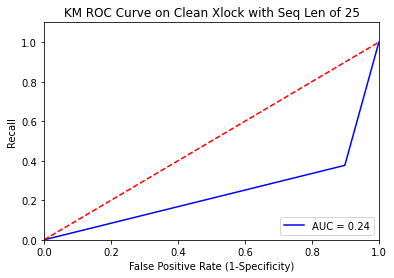

Test AUC: 0.239



--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[ 460 4081]
 [  66   52]]

Testing Accuracy: 0.11
Precision:0.01
Recall: 0.44
False Positive Rate: 0.90

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.10      0.18      4541
           1       0.01      0.44      0.02       118

    accuracy                           0.11      4659
   macro avg       0.44      0.27      0.10      4659
weighted avg       0.85      0.11      0.18      4659

AUC: 0.27


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


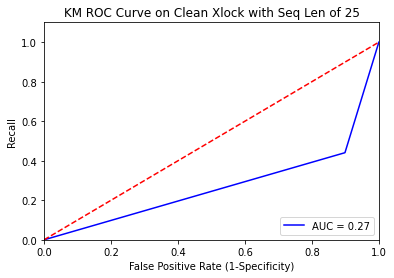

Test AUC: 0.271


In [ ]:
## TESTING K-MEANS with clean data and unclean data
KM_clean_perf   = test_model(test_clean, y_test_clean, kmeans, 'KM', 'clean', dup_status=0); print('\n\n')
KM_unclean_perf = test_model(test_unclean, y_test_unclean, kmeans, 'KM', 'unclean', dup_status=101)

write_to_file(KM_clean_perf, 'KM', 'clean')
write_to_file(KM_unclean_perf, 'KM', 'unclean')

---------------------Testing with 60% duplication---------------------
--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[ 446 3840]
 [  57   20]]

Testing Accuracy: 0.11
Precision:0.01
Recall: 0.26
False Positive Rate: 0.90

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.10      0.19      4286
           1       0.01      0.26      0.01        77

    accuracy                           0.11      4363
   macro avg       0.45      0.18      0.10      4363
weighted avg       0.87      0.11      0.18      4363

AUC: 0.18


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


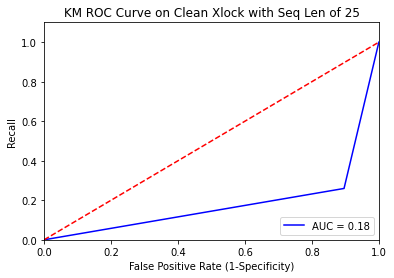

Test AUC: 0.182


---------------------Testing with 30% duplication---------------------
--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[ 434 3852]
 [  51   26]]

Testing Accuracy: 0.11
Precision:0.01
Recall: 0.34
False Positive Rate: 0.90

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.10      0.18      4286
           1       0.01      0.34      0.01        77

    accuracy                           0.11      4363
   macro avg       0.45      0.22      0.10      4363
weighted avg       0.88      0.11      0.18      4363

AUC: 0.22


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


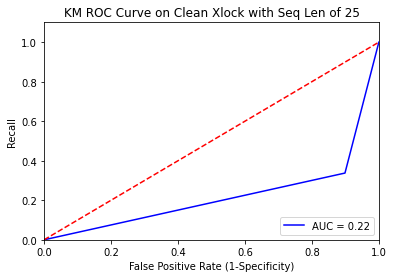

Test AUC: 0.219


---------------------Testing with 95% duplication---------------------
--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[ 502 3784]
 [  77    0]]

Testing Accuracy: 0.12
Precision:0.00
Recall: 0.00
False Positive Rate: 0.88

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.12      0.21      4286
           1       0.00      0.00      0.00        77

    accuracy                           0.12      4363
   macro avg       0.43      0.06      0.10      4363
weighted avg       0.85      0.12      0.20      4363

AUC: 0.06


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


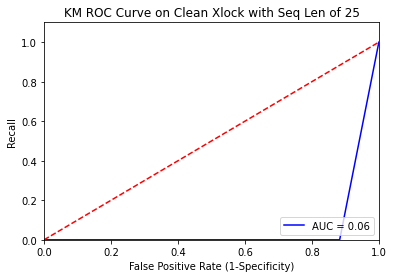

Test AUC: 0.059


---------------------Testing with 55% duplication---------------------
--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[ 437 3849]
 [  56   21]]

Testing Accuracy: 0.10
Precision:0.01
Recall: 0.27
False Positive Rate: 0.90

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.10      0.18      4286
           1       0.01      0.27      0.01        77

    accuracy                           0.10      4363
   macro avg       0.45      0.19      0.10      4363
weighted avg       0.87      0.10      0.18      4363

AUC: 0.19


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


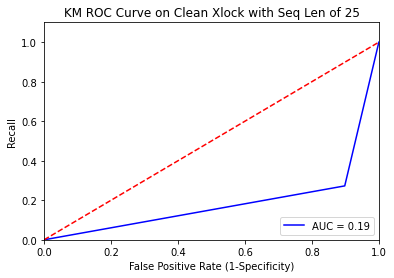

Test AUC: 0.187


---------------------Testing with 25% duplication---------------------
--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[ 442 3844]
 [  44   33]]

Testing Accuracy: 0.11
Precision:0.01
Recall: 0.43
False Positive Rate: 0.90

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.10      0.19      4286
           1       0.01      0.43      0.02        77

    accuracy                           0.11      4363
   macro avg       0.46      0.27      0.10      4363
weighted avg       0.89      0.11      0.18      4363

AUC: 0.27


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


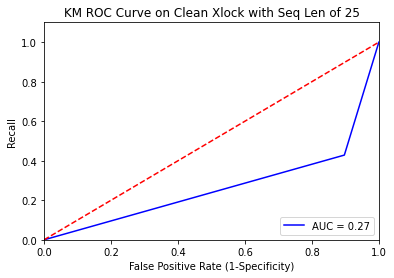

Test AUC: 0.266


---------------------Testing with 85% duplication---------------------
--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[ 449 3837]
 [  70    7]]

Testing Accuracy: 0.10
Precision:0.00
Recall: 0.09
False Positive Rate: 0.90

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.10      0.19      4286
           1       0.00      0.09      0.00        77

    accuracy                           0.10      4363
   macro avg       0.43      0.10      0.10      4363
weighted avg       0.85      0.10      0.18      4363

AUC: 0.10


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


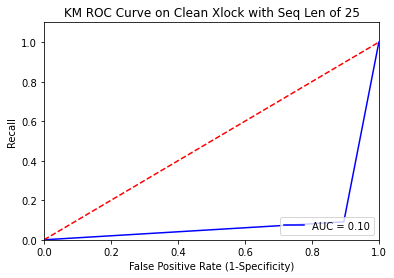

Test AUC: 0.098


---------------------Testing with 70% duplication---------------------
--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[ 463 3823]
 [  49   28]]

Testing Accuracy: 0.11
Precision:0.01
Recall: 0.36
False Positive Rate: 0.89

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.11      0.19      4286
           1       0.01      0.36      0.01        77

    accuracy                           0.11      4363
   macro avg       0.46      0.24      0.10      4363
weighted avg       0.89      0.11      0.19      4363

AUC: 0.24


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


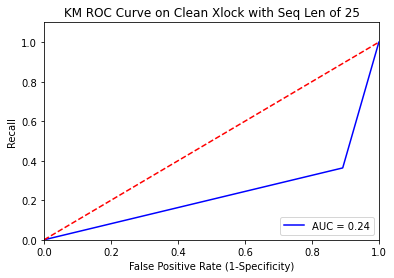

Test AUC: 0.236


---------------------Testing with 75% duplication---------------------
--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[ 400 3886]
 [  49   28]]

Testing Accuracy: 0.10
Precision:0.01
Recall: 0.36
False Positive Rate: 0.91

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.09      0.17      4286
           1       0.01      0.36      0.01        77

    accuracy                           0.10      4363
   macro avg       0.45      0.23      0.09      4363
weighted avg       0.88      0.10      0.17      4363

AUC: 0.23


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


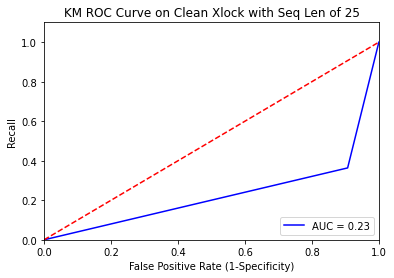

Test AUC: 0.228


---------------------Testing with 10% duplication---------------------
--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[ 434 3852]
 [  50   27]]

Testing Accuracy: 0.11
Precision:0.01
Recall: 0.35
False Positive Rate: 0.90

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.10      0.18      4286
           1       0.01      0.35      0.01        77

    accuracy                           0.11      4363
   macro avg       0.45      0.23      0.10      4363
weighted avg       0.88      0.11      0.18      4363

AUC: 0.23


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


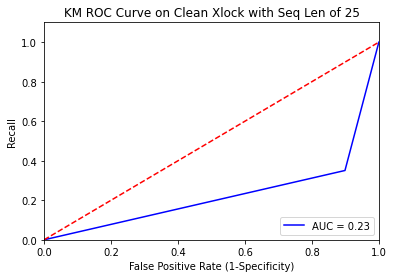

Test AUC: 0.226


---------------------Testing with 40% duplication---------------------
--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[ 433 3853]
 [  49   28]]

Testing Accuracy: 0.11
Precision:0.01
Recall: 0.36
False Positive Rate: 0.90

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.10      0.18      4286
           1       0.01      0.36      0.01        77

    accuracy                           0.11      4363
   macro avg       0.45      0.23      0.10      4363
weighted avg       0.88      0.11      0.18      4363

AUC: 0.23


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


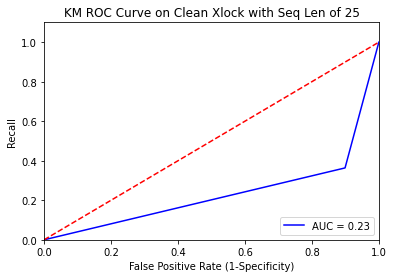

Test AUC: 0.232


---------------------Testing with 65% duplication---------------------
--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[ 447 3839]
 [  56   21]]

Testing Accuracy: 0.11
Precision:0.01
Recall: 0.27
False Positive Rate: 0.90

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.10      0.19      4286
           1       0.01      0.27      0.01        77

    accuracy                           0.11      4363
   macro avg       0.45      0.19      0.10      4363
weighted avg       0.87      0.11      0.18      4363

AUC: 0.19


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


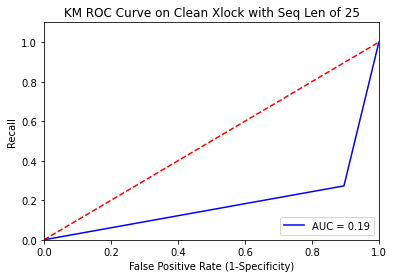

Test AUC: 0.189


---------------------Testing with 5% duplication---------------------
--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[ 438 3848]
 [  48   29]]

Testing Accuracy: 0.11
Precision:0.01
Recall: 0.38
False Positive Rate: 0.90

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.10      0.18      4286
           1       0.01      0.38      0.01        77

    accuracy                           0.11      4363
   macro avg       0.45      0.24      0.10      4363
weighted avg       0.89      0.11      0.18      4363

AUC: 0.24


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


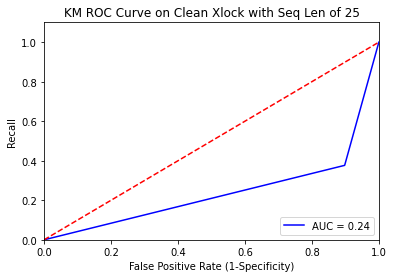

Test AUC: 0.239


---------------------Testing with 35% duplication---------------------
--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[ 449 3837]
 [  56   21]]

Testing Accuracy: 0.11
Precision:0.01
Recall: 0.27
False Positive Rate: 0.90

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.10      0.19      4286
           1       0.01      0.27      0.01        77

    accuracy                           0.11      4363
   macro avg       0.45      0.19      0.10      4363
weighted avg       0.87      0.11      0.18      4363

AUC: 0.19


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


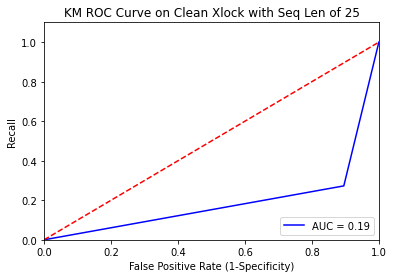

Test AUC: 0.189


---------------------Testing with 80% duplication---------------------
--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[ 365 3921]
 [  46   31]]

Testing Accuracy: 0.09
Precision:0.01
Recall: 0.40
False Positive Rate: 0.91

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.09      0.16      4286
           1       0.01      0.40      0.02        77

    accuracy                           0.09      4363
   macro avg       0.45      0.24      0.09      4363
weighted avg       0.87      0.09      0.15      4363

AUC: 0.24


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


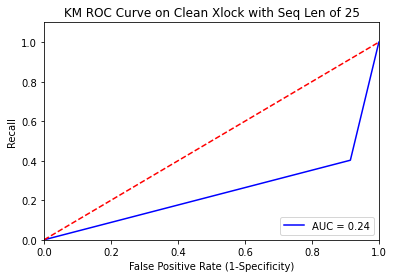

Test AUC: 0.244


---------------------Testing with 20% duplication---------------------
--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[ 445 3841]
 [  49   28]]

Testing Accuracy: 0.11
Precision:0.01
Recall: 0.36
False Positive Rate: 0.90

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.10      0.19      4286
           1       0.01      0.36      0.01        77

    accuracy                           0.11      4363
   macro avg       0.45      0.23      0.10      4363
weighted avg       0.89      0.11      0.18      4363

AUC: 0.23


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


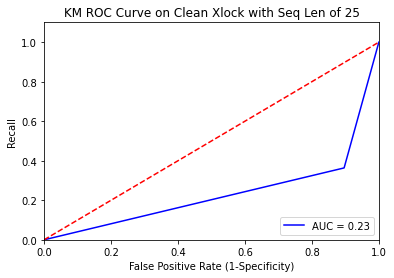

Test AUC: 0.234


---------------------Testing with 15% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[ 436 3850]
 [  47   30]]

Testing Accuracy: 0.11
Precision:0.01
Recall: 0.39
False Positive Rate: 0.90

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.10      0.18      4286
           1       0.01      0.39      0.02        77

    accuracy                           0.11      4363
   macro avg       0.46      0.25      0.10      4363
weighted avg       0.89      0.11      0.18      4363

AUC: 0.25


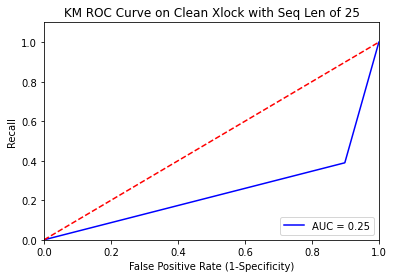

Test AUC: 0.246


---------------------Testing with 45% duplication---------------------
--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[ 403 3883]
 [  43   34]]

Testing Accuracy: 0.10
Precision:0.01
Recall: 0.44
False Positive Rate: 0.91

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.09      0.17      4286
           1       0.01      0.44      0.02        77

    accuracy                           0.10      4363
   macro avg       0.46      0.27      0.09      4363
weighted avg       0.89      0.10      0.17      4363

AUC: 0.27


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


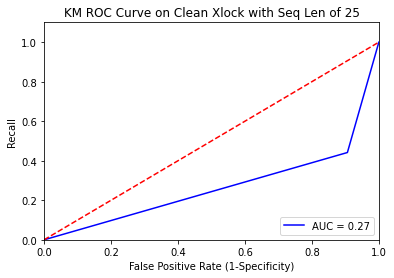

Test AUC: 0.268


---------------------Testing with 90% duplication---------------------
--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[ 442 3844]
 [  57   20]]

Testing Accuracy: 0.11
Precision:0.01
Recall: 0.26
False Positive Rate: 0.90

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.10      0.18      4286
           1       0.01      0.26      0.01        77

    accuracy                           0.11      4363
   macro avg       0.45      0.18      0.10      4363
weighted avg       0.87      0.11      0.18      4363

AUC: 0.18


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


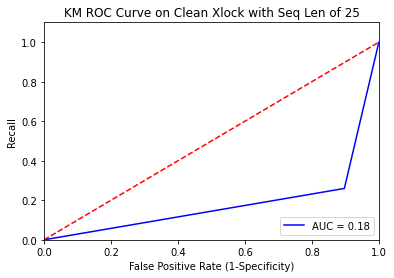

Test AUC: 0.181


---------------------Testing with 50% duplication---------------------
--------------------KM on unclean data --------------------
Confusion Matrix: 
 [[ 486 3800]
 [  44   33]]

Testing Accuracy: 0.12
Precision:0.01
Recall: 0.43
False Positive Rate: 0.89

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.11      0.20      4286
           1       0.01      0.43      0.02        77

    accuracy                           0.12      4363
   macro avg       0.46      0.27      0.11      4363
weighted avg       0.90      0.12      0.20      4363

AUC: 0.27


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


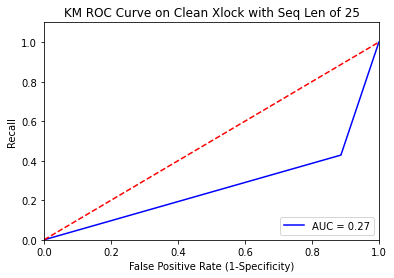

Test AUC: 0.271




In [ ]:
def test_with_duplication(model, model_name):
  i = 0
  for f in test_files:
    label = f['Label']; data = f.drop(columns = ['Label'])

    outfile = open('{}-{}-Models-Output.txt'.format(DATA, clean_status), "a")  # Live-Named-Clean-Models-Output.txt
    outfile.write('---------------------Testing with %d%% duplication---------------------'% dup_order[i])
    outfile.close()
    print('---------------------Testing with %d%% duplication---------------------'% dup_order[i])
    test_model(data, label, model, model_name, 'unclean', dup_status = dup_order[i]); print('\n')
    i+=1
  outfile = open('{}-{}-Models-Output.txt'.format(DATA, clean_status), "a")  # Live-Named-Clean-Models-Output.txt
  outfile.write('---------------------------------Finish---------------------------------')
  outfile.close()

test_with_duplication(kmeans, 'KM')



# **Logistic Regression**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------LR on clean data --------------------
Confusion Matrix: 
 [[3303  983]
 [  17   60]]

Testing Accuracy: 0.77
Precision:0.06
Recall: 0.78
False Positive Rate: 0.23

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.77      0.87      4286
           1       0.06      0.78      0.11        77

    accuracy                           0.77      4363
   macro avg       0.53      0.77      0.49      4363
weighted avg       0.98      0.77      0.86      4363

AUC: 0.77


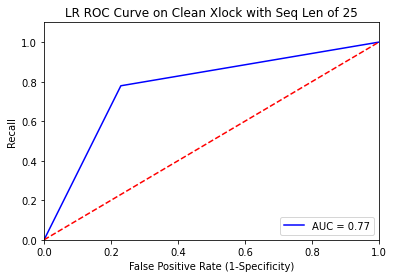

Test AUC: 0.775



--------------------LR on unclean data --------------------
Confusion Matrix: 
 [[3506 1035]
 [  34   84]]

Testing Accuracy: 0.77
Precision:0.08
Recall: 0.71
False Positive Rate: 0.23

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.77      0.87      4541
           1       0.08      0.71      0.14       118

    accuracy                           0.77      4659
   macro avg       0.53      0.74      0.50      4659
weighted avg       0.97      0.77      0.85      4659

AUC: 0.74


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


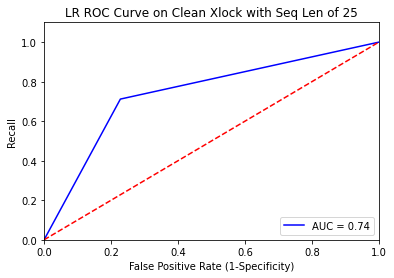

Test AUC: 0.742


In [ ]:
from sklearn.linear_model import LogisticRegression

# Fit the model on the training set
lgModel = LogisticRegression().fit(x_train, y_train)

save_models(lgModel,   'LR')

## TESTING Logistic Regression with clean data and unclean data
LR_clean_perf   = test_model(test_clean, y_test_clean, lgModel, 'LR', 'clean', dup_status=0); print('\n\n')
LR_unclean_perf = test_model(test_unclean, y_test_unclean, lgModel, 'LR', 'unclean', dup_status= 101)

In [ ]:
# Save performance to text file
write_to_file(LR_clean_perf, 'LR', 'clean')
write_to_file(LR_unclean_perf, 'LR', 'unclean')

---------------------Testing with 60% duplication---------------------
--------------------LR on unclean data --------------------
Confusion Matrix: 
 [[3299  987]
 [  11   66]]

Testing Accuracy: 0.77
Precision:0.06
Recall: 0.86
False Positive Rate: 0.23

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87      4286
           1       0.06      0.86      0.12        77

    accuracy                           0.77      4363
   macro avg       0.53      0.81      0.49      4363
weighted avg       0.98      0.77      0.86      4363

AUC: 0.81


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


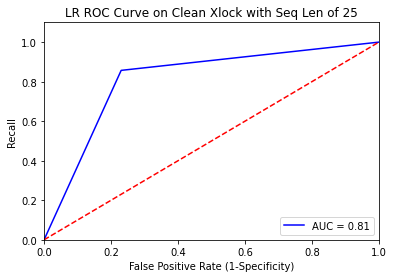

Test AUC: 0.813


---------------------Testing with 30% duplication---------------------
--------------------LR on unclean data --------------------
Confusion Matrix: 
 [[3337  949]
 [  15   62]]

Testing Accuracy: 0.78
Precision:0.06
Recall: 0.81
False Positive Rate: 0.22

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.87      4286
           1       0.06      0.81      0.11        77

    accuracy                           0.78      4363
   macro avg       0.53      0.79      0.49      4363
weighted avg       0.98      0.78      0.86      4363

AUC: 0.79


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


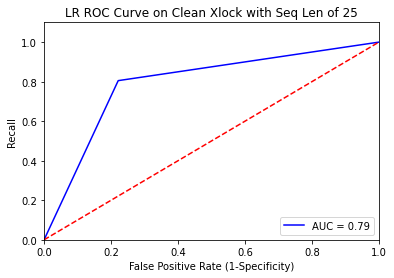

Test AUC: 0.792


---------------------Testing with 95% duplication---------------------
--------------------LR on unclean data --------------------
Confusion Matrix: 
 [[3158 1128]
 [   0   77]]

Testing Accuracy: 0.74
Precision:0.06
Recall: 1.00
False Positive Rate: 0.26

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.74      0.85      4286
           1       0.06      1.00      0.12        77

    accuracy                           0.74      4363
   macro avg       0.53      0.87      0.48      4363
weighted avg       0.98      0.74      0.84      4363

AUC: 0.87


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


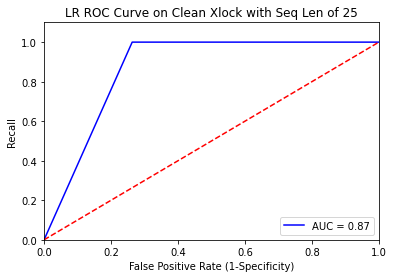

Test AUC: 0.868


---------------------Testing with 55% duplication---------------------
--------------------LR on unclean data --------------------
Confusion Matrix: 
 [[3344  942]
 [  11   66]]

Testing Accuracy: 0.78
Precision:0.07
Recall: 0.86
False Positive Rate: 0.22

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88      4286
           1       0.07      0.86      0.12        77

    accuracy                           0.78      4363
   macro avg       0.53      0.82      0.50      4363
weighted avg       0.98      0.78      0.86      4363

AUC: 0.82


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


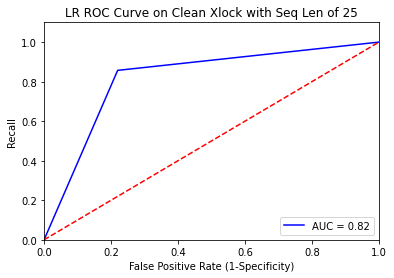

Test AUC: 0.819


---------------------Testing with 25% duplication---------------------
--------------------LR on unclean data --------------------
Confusion Matrix: 
 [[3274 1012]
 [  22   55]]

Testing Accuracy: 0.76
Precision:0.05
Recall: 0.71
False Positive Rate: 0.24

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.76      0.86      4286
           1       0.05      0.71      0.10        77

    accuracy                           0.76      4363
   macro avg       0.52      0.74      0.48      4363
weighted avg       0.98      0.76      0.85      4363

AUC: 0.74


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


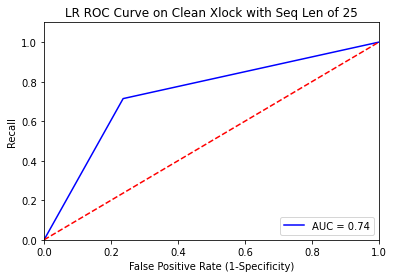

Test AUC: 0.739


---------------------Testing with 85% duplication---------------------
--------------------LR on unclean data --------------------
Confusion Matrix: 
 [[3316  970]
 [   7   70]]

Testing Accuracy: 0.78
Precision:0.07
Recall: 0.91
False Positive Rate: 0.23

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87      4286
           1       0.07      0.91      0.13        77

    accuracy                           0.78      4363
   macro avg       0.53      0.84      0.50      4363
weighted avg       0.98      0.78      0.86      4363

AUC: 0.84


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


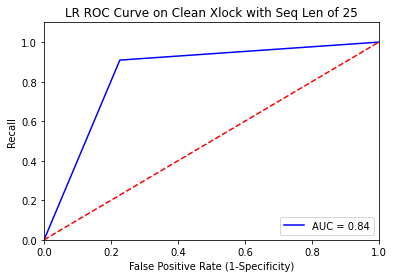

Test AUC: 0.841


---------------------Testing with 70% duplication---------------------
--------------------LR on unclean data --------------------
Confusion Matrix: 
 [[3300  986]
 [  16   61]]

Testing Accuracy: 0.77
Precision:0.06
Recall: 0.79
False Positive Rate: 0.23

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87      4286
           1       0.06      0.79      0.11        77

    accuracy                           0.77      4363
   macro avg       0.53      0.78      0.49      4363
weighted avg       0.98      0.77      0.85      4363

AUC: 0.78


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


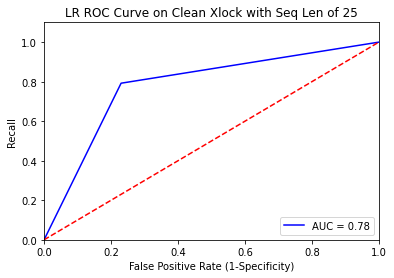

Test AUC: 0.781


---------------------Testing with 75% duplication---------------------
--------------------LR on unclean data --------------------
Confusion Matrix: 
 [[3360  926]
 [  15   62]]

Testing Accuracy: 0.78
Precision:0.06
Recall: 0.81
False Positive Rate: 0.22

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88      4286
           1       0.06      0.81      0.12        77

    accuracy                           0.78      4363
   macro avg       0.53      0.79      0.50      4363
weighted avg       0.98      0.78      0.86      4363

AUC: 0.79


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


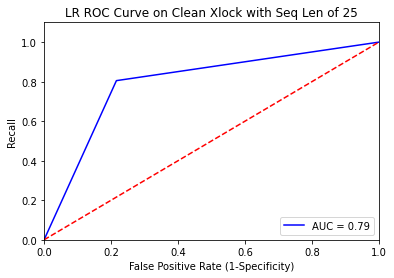

Test AUC: 0.795


---------------------Testing with 10% duplication---------------------
--------------------LR on unclean data --------------------
Confusion Matrix: 
 [[3303  983]
 [  16   61]]

Testing Accuracy: 0.77
Precision:0.06
Recall: 0.79
False Positive Rate: 0.23

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87      4286
           1       0.06      0.79      0.11        77

    accuracy                           0.77      4363
   macro avg       0.53      0.78      0.49      4363
weighted avg       0.98      0.77      0.86      4363

AUC: 0.78


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


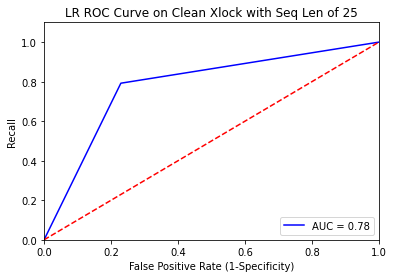

Test AUC: 0.781


---------------------Testing with 40% duplication---------------------
--------------------LR on unclean data --------------------
Confusion Matrix: 
 [[3285 1001]
 [  16   61]]

Testing Accuracy: 0.77
Precision:0.06
Recall: 0.79
False Positive Rate: 0.23

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87      4286
           1       0.06      0.79      0.11        77

    accuracy                           0.77      4363
   macro avg       0.53      0.78      0.49      4363
weighted avg       0.98      0.77      0.85      4363

AUC: 0.78


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


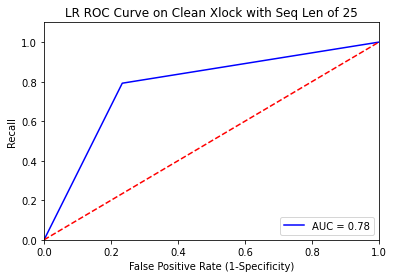

Test AUC: 0.779


---------------------Testing with 65% duplication---------------------
--------------------LR on unclean data --------------------
Confusion Matrix: 
 [[3313  973]
 [  15   62]]

Testing Accuracy: 0.77
Precision:0.06
Recall: 0.81
False Positive Rate: 0.23

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87      4286
           1       0.06      0.81      0.11        77

    accuracy                           0.77      4363
   macro avg       0.53      0.79      0.49      4363
weighted avg       0.98      0.77      0.86      4363

AUC: 0.79


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


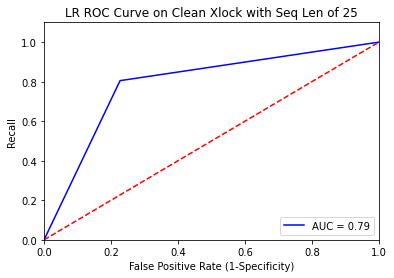

Test AUC: 0.789


---------------------Testing with 5% duplication---------------------
--------------------LR on unclean data --------------------
Confusion Matrix: 
 [[3296  990]
 [  18   59]]

Testing Accuracy: 0.77
Precision:0.06
Recall: 0.77
False Positive Rate: 0.23

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.77      0.87      4286
           1       0.06      0.77      0.10        77

    accuracy                           0.77      4363
   macro avg       0.53      0.77      0.49      4363
weighted avg       0.98      0.77      0.85      4363

AUC: 0.77


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


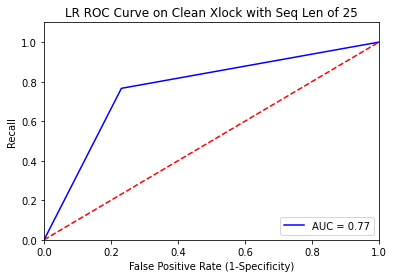

Test AUC: 0.768


---------------------Testing with 35% duplication---------------------
--------------------LR on unclean data --------------------
Confusion Matrix: 
 [[3227 1059]
 [  15   62]]

Testing Accuracy: 0.75
Precision:0.06
Recall: 0.81
False Positive Rate: 0.25

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86      4286
           1       0.06      0.81      0.10        77

    accuracy                           0.75      4363
   macro avg       0.53      0.78      0.48      4363
weighted avg       0.98      0.75      0.84      4363

AUC: 0.78


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


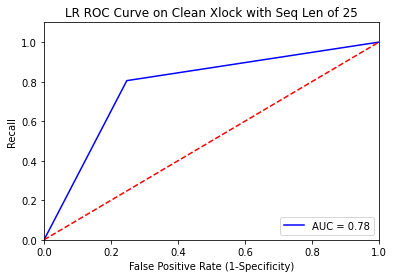

Test AUC: 0.779


---------------------Testing with 80% duplication---------------------
--------------------LR on unclean data --------------------
Confusion Matrix: 
 [[3390  896]
 [   0   77]]

Testing Accuracy: 0.79
Precision:0.08
Recall: 1.00
False Positive Rate: 0.21

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.79      0.88      4286
           1       0.08      1.00      0.15        77

    accuracy                           0.79      4363
   macro avg       0.54      0.90      0.51      4363
weighted avg       0.98      0.79      0.87      4363

AUC: 0.90


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


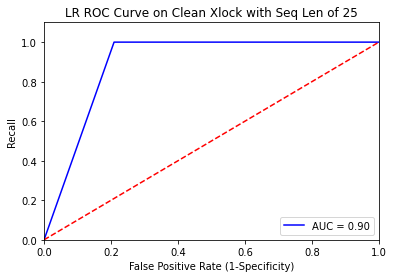

Test AUC: 0.895


---------------------Testing with 20% duplication---------------------
--------------------LR on unclean data --------------------
Confusion Matrix: 
 [[3298  988]
 [  19   58]]

Testing Accuracy: 0.77
Precision:0.06
Recall: 0.75
False Positive Rate: 0.23

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.77      0.87      4286
           1       0.06      0.75      0.10        77

    accuracy                           0.77      4363
   macro avg       0.52      0.76      0.49      4363
weighted avg       0.98      0.77      0.85      4363

AUC: 0.76


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


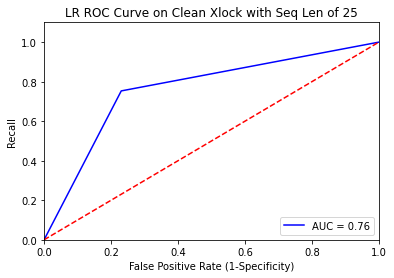

Test AUC: 0.761


---------------------Testing with 15% duplication---------------------
--------------------LR on unclean data --------------------
Confusion Matrix: 
 [[3317  969]
 [  17   60]]

Testing Accuracy: 0.77
Precision:0.06
Recall: 0.78
False Positive Rate: 0.23

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.77      0.87      4286
           1       0.06      0.78      0.11        77

    accuracy                           0.77      4363
   macro avg       0.53      0.78      0.49      4363
weighted avg       0.98      0.77      0.86      4363

AUC: 0.78


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


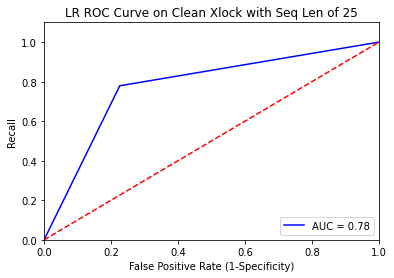

Test AUC: 0.777


---------------------Testing with 45% duplication---------------------
--------------------LR on unclean data --------------------
Confusion Matrix: 
 [[3371  915]
 [  22   55]]

Testing Accuracy: 0.79
Precision:0.06
Recall: 0.71
False Positive Rate: 0.21

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.79      0.88      4286
           1       0.06      0.71      0.11        77

    accuracy                           0.79      4363
   macro avg       0.53      0.75      0.49      4363
weighted avg       0.98      0.79      0.86      4363

AUC: 0.75


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


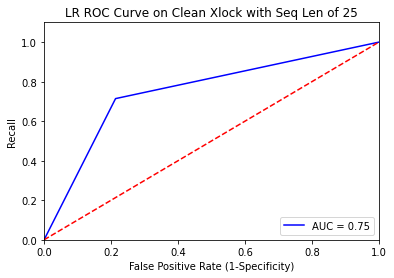

Test AUC: 0.750


---------------------Testing with 90% duplication---------------------
--------------------LR on unclean data --------------------
Confusion Matrix: 
 [[3303  983]
 [  12   65]]

Testing Accuracy: 0.77
Precision:0.06
Recall: 0.84
False Positive Rate: 0.23

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87      4286
           1       0.06      0.84      0.12        77

    accuracy                           0.77      4363
   macro avg       0.53      0.81      0.49      4363
weighted avg       0.98      0.77      0.86      4363

AUC: 0.81


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


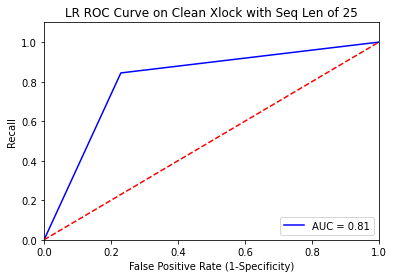

Test AUC: 0.807


---------------------Testing with 50% duplication---------------------
--------------------LR on unclean data --------------------
Confusion Matrix: 
 [[3256 1030]
 [  13   64]]

Testing Accuracy: 0.76
Precision:0.06
Recall: 0.83
False Positive Rate: 0.24

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.76      0.86      4286
           1       0.06      0.83      0.11        77

    accuracy                           0.76      4363
   macro avg       0.53      0.80      0.49      4363
weighted avg       0.98      0.76      0.85      4363

AUC: 0.80


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


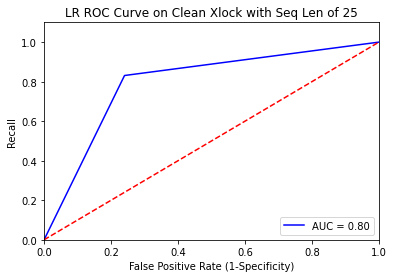

Test AUC: 0.795




In [ ]:
# Test with Duplication 
test_with_duplication(lgModel, 'LR')

# **SVM**

This model uses a Polynomial kernel, and the rest of the parameters are as default






In [ ]:
if len(x_train) > 500000: 
  svm_sz = 0.05  
elif len(x_train) > 100000:
  svm_sz = 0.2
else:
  svm_sz = 1

svm_sz

1

In [ ]:

train_data = x_train.copy(deep=True) # create a deep copy of x_train, so any modification to train_data won't affect x_train
train_data['Label'] = y_train
train_data = train_data.groupby('Label').sample(frac = svm_sz)
train_data.reset_index(drop=True, inplace= True)

svm_x_train = train_data.drop(columns='Label')
svm_y_train = train_data['Label']
svm_x_train

0    1    2    3    4    5    6    7   8    9   ...   15   16   17  \
0       82   54    3   78   54   78   78   82  54    3  ...   54    3    4   
1        4    4  119    4    4    4  119    4   4    4  ...    3   82    4   
2      119    4    4  119    4    4  119    4   4  119  ...   82  119  119   
3        3   82    4    3   82    3   82  119   4    3  ...    3   82  119   
4       82  119    4    3   82  119    4    3  82  119  ...    3   82  119   
...    ...  ...  ...  ...  ...  ...  ...  ...  ..  ...  ...  ...  ...  ...   
34401   89   89   89   89  107    6  107  106   5   55  ...   89   89   89   
34402   55   89   89   89   89   89   89   89  89   89  ...   89   89   89   
34403   67   67   67    4    4   67  106    5   4    6  ...   -1   -1   -1   
34404  126   54  126  126  126  126  126   67  13   49  ...  126   54  126   
34405  125  125  125  136   45   13   45   45  45   45  ...    5  108   45   

        18   19   20   21   22   23  24  
0        4    3  126   67   13   27  72  
1      119    4    4    4    4  119   4  
2      119  119    4  119    4    3  82  
3        3   82    4    3   82  119  82  
4        4    4    3   82  119    4   3  
...    ...  ...  ...  ...  ...  ...  ..  
34401  107    6   20   45   64   24   5  
34402   89   89   89   89   89   89  89  
34403   -1   -1   -1   -1   -1   -1  -1  
34404   67  126   54   54  126   67  67  
34405    3    3    3    6    5  108   3  

[34406 rows x 25 columns]


****Polynomial kernel model: 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------SVM on clean data --------------------
Confusion Matrix: 
 [[4157  129]
 [  34   43]]

Testing Accuracy: 0.96
Precision:0.25
Recall: 0.56
False Positive Rate: 0.03

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4286
           1       0.25      0.56      0.35        77

    accuracy                           0.96      4363
   macro avg       0.62      0.76      0.66      4363
weighted avg       0.98      0.96      0.97      4363

AUC: 0.76


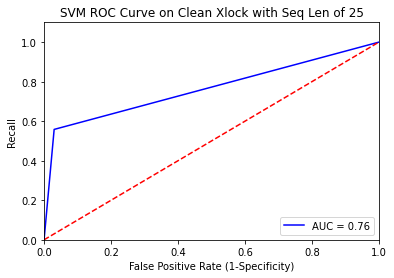

Test AUC: 0.764





/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------SVM on unclean data --------------------
Confusion Matrix: 
 [[4395  146]
 [  57   61]]

Testing Accuracy: 0.96
Precision:0.29
Recall: 0.52
False Positive Rate: 0.03

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4541
           1       0.29      0.52      0.38       118

    accuracy                           0.96      4659
   macro avg       0.64      0.74      0.68      4659
weighted avg       0.97      0.96      0.96      4659

AUC: 0.74


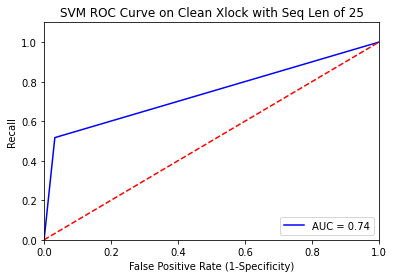

Test AUC: 0.742


In [ ]:
from sklearn import svm

#### Create a SVM classifier using polynomial Kernel
print('\n****Polynomial kernel model: ')
svm_model = svm.SVC(kernel = 'poly')

#Train the  & Get accuracy from training
svm_model.fit(svm_x_train, svm_y_train)

# Save Model
save_models(svm_model, 'SVM')

## TESTING SVM with clean data and unclean data
SVM_clean_perf   = test_model(test_clean,   y_test_clean,   svm_model, 'SVM', 'clean', dup_status= 0); print('\n\n')
SVM_unclean_perf = test_model(test_unclean, y_test_unclean, svm_model, 'SVM', 'unclean', dup_status = 101)

# Save performance to text file
write_to_file(SVM_clean_perf, 'SVM', 'clean')
write_to_file(SVM_unclean_perf, 'SVM', 'unclean')

---------------------Testing with 60% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------SVM on unclean data --------------------
Confusion Matrix: 
 [[4159  127]
 [  36   41]]

Testing Accuracy: 0.96
Precision:0.24
Recall: 0.53
False Positive Rate: 0.03

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4286
           1       0.24      0.53      0.33        77

    accuracy                           0.96      4363
   macro avg       0.62      0.75      0.66      4363
weighted avg       0.98      0.96      0.97      4363

AUC: 0.75


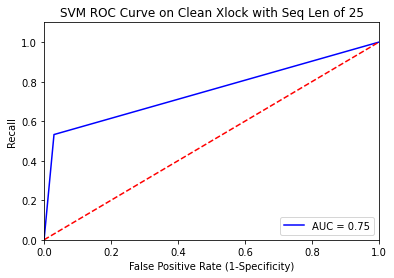

Test AUC: 0.751


---------------------Testing with 30% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------SVM on unclean data --------------------
Confusion Matrix: 
 [[4161  125]
 [  33   44]]

Testing Accuracy: 0.96
Precision:0.26
Recall: 0.57
False Positive Rate: 0.03

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4286
           1       0.26      0.57      0.36        77

    accuracy                           0.96      4363
   macro avg       0.63      0.77      0.67      4363
weighted avg       0.98      0.96      0.97      4363

AUC: 0.77


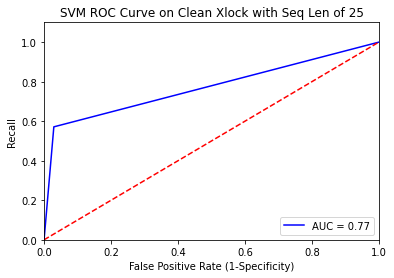

Test AUC: 0.771


---------------------Testing with 95% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------SVM on unclean data --------------------
Confusion Matrix: 
 [[4081  205]
 [   0   77]]

Testing Accuracy: 0.95
Precision:0.27
Recall: 1.00
False Positive Rate: 0.05

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      4286
           1       0.27      1.00      0.43        77

    accuracy                           0.95      4363
   macro avg       0.64      0.98      0.70      4363
weighted avg       0.99      0.95      0.97      4363

AUC: 0.98


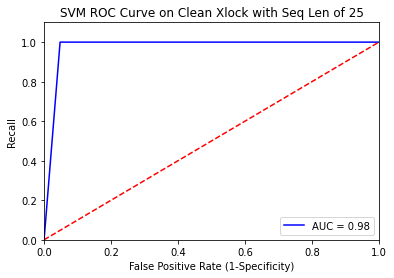

Test AUC: 0.976


---------------------Testing with 55% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------SVM on unclean data --------------------
Confusion Matrix: 
 [[4167  119]
 [  22   55]]

Testing Accuracy: 0.97
Precision:0.32
Recall: 0.71
False Positive Rate: 0.03

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4286
           1       0.32      0.71      0.44        77

    accuracy                           0.97      4363
   macro avg       0.66      0.84      0.71      4363
weighted avg       0.98      0.97      0.97      4363

AUC: 0.84


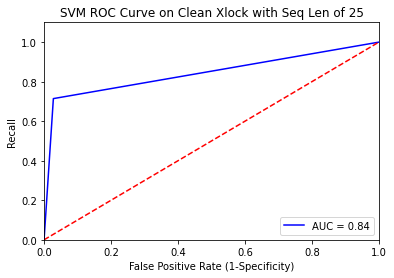

Test AUC: 0.843


---------------------Testing with 25% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------SVM on unclean data --------------------
Confusion Matrix: 
 [[4145  141]
 [  36   41]]

Testing Accuracy: 0.96
Precision:0.23
Recall: 0.53
False Positive Rate: 0.03

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4286
           1       0.23      0.53      0.32        77

    accuracy                           0.96      4363
   macro avg       0.61      0.75      0.65      4363
weighted avg       0.98      0.96      0.97      4363

AUC: 0.75


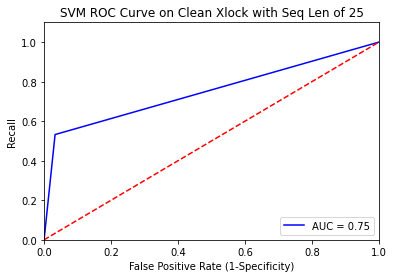

Test AUC: 0.750


---------------------Testing with 85% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------SVM on unclean data --------------------
Confusion Matrix: 
 [[4172  114]
 [   9   68]]

Testing Accuracy: 0.97
Precision:0.37
Recall: 0.88
False Positive Rate: 0.03

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      4286
           1       0.37      0.88      0.53        77

    accuracy                           0.97      4363
   macro avg       0.69      0.93      0.76      4363
weighted avg       0.99      0.97      0.98      4363

AUC: 0.93


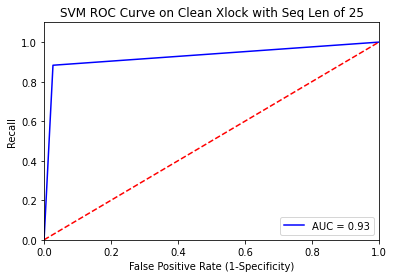

Test AUC: 0.928


---------------------Testing with 70% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------SVM on unclean data --------------------
Confusion Matrix: 
 [[4167  119]
 [  38   39]]

Testing Accuracy: 0.96
Precision:0.25
Recall: 0.51
False Positive Rate: 0.03

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4286
           1       0.25      0.51      0.33        77

    accuracy                           0.96      4363
   macro avg       0.62      0.74      0.66      4363
weighted avg       0.98      0.96      0.97      4363

AUC: 0.74


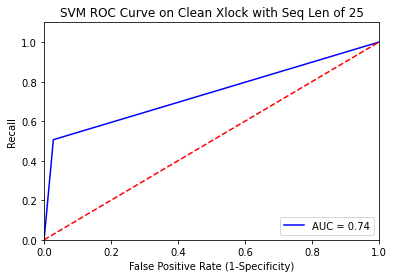

Test AUC: 0.739


---------------------Testing with 75% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------SVM on unclean data --------------------
Confusion Matrix: 
 [[4174  112]
 [  34   43]]

Testing Accuracy: 0.97
Precision:0.28
Recall: 0.56
False Positive Rate: 0.03

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4286
           1       0.28      0.56      0.37        77

    accuracy                           0.97      4363
   macro avg       0.63      0.77      0.68      4363
weighted avg       0.98      0.97      0.97      4363

AUC: 0.77


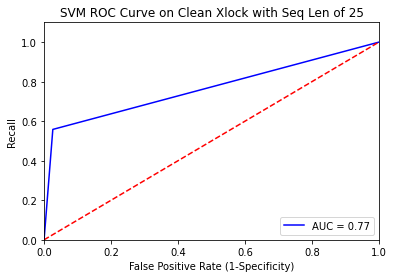

Test AUC: 0.766


---------------------Testing with 10% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------SVM on unclean data --------------------
Confusion Matrix: 
 [[4156  130]
 [  31   46]]

Testing Accuracy: 0.96
Precision:0.26
Recall: 0.60
False Positive Rate: 0.03

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4286
           1       0.26      0.60      0.36        77

    accuracy                           0.96      4363
   macro avg       0.63      0.78      0.67      4363
weighted avg       0.98      0.96      0.97      4363

AUC: 0.78


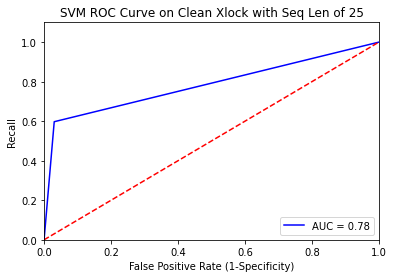

Test AUC: 0.784


---------------------Testing with 40% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------SVM on unclean data --------------------
Confusion Matrix: 
 [[4164  122]
 [  37   40]]

Testing Accuracy: 0.96
Precision:0.25
Recall: 0.52
False Positive Rate: 0.03

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4286
           1       0.25      0.52      0.33        77

    accuracy                           0.96      4363
   macro avg       0.62      0.75      0.66      4363
weighted avg       0.98      0.96      0.97      4363

AUC: 0.75


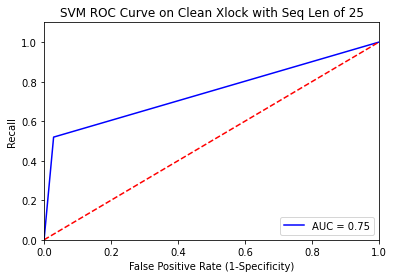

Test AUC: 0.746


---------------------Testing with 65% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------SVM on unclean data --------------------
Confusion Matrix: 
 [[4143  143]
 [  29   48]]

Testing Accuracy: 0.96
Precision:0.25
Recall: 0.62
False Positive Rate: 0.03

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4286
           1       0.25      0.62      0.36        77

    accuracy                           0.96      4363
   macro avg       0.62      0.80      0.67      4363
weighted avg       0.98      0.96      0.97      4363

AUC: 0.80


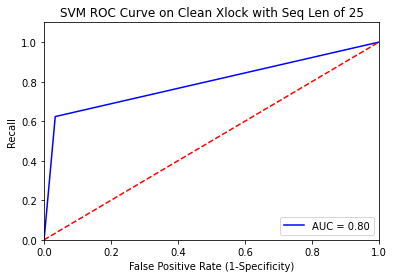

Test AUC: 0.795


---------------------Testing with 5% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------SVM on unclean data --------------------
Confusion Matrix: 
 [[4164  122]
 [  32   45]]

Testing Accuracy: 0.96
Precision:0.27
Recall: 0.58
False Positive Rate: 0.03

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4286
           1       0.27      0.58      0.37        77

    accuracy                           0.96      4363
   macro avg       0.63      0.78      0.68      4363
weighted avg       0.98      0.96      0.97      4363

AUC: 0.78


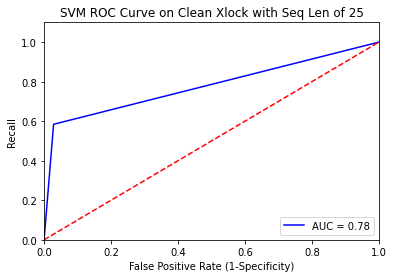

Test AUC: 0.778


---------------------Testing with 35% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------SVM on unclean data --------------------
Confusion Matrix: 
 [[4157  129]
 [  25   52]]

Testing Accuracy: 0.96
Precision:0.29
Recall: 0.68
False Positive Rate: 0.03

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4286
           1       0.29      0.68      0.40        77

    accuracy                           0.96      4363
   macro avg       0.64      0.82      0.69      4363
weighted avg       0.98      0.96      0.97      4363

AUC: 0.82


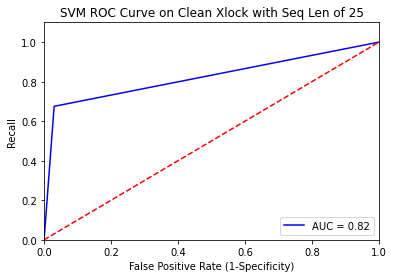

Test AUC: 0.823


---------------------Testing with 80% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------SVM on unclean data --------------------
Confusion Matrix: 
 [[4177  109]
 [  29   48]]

Testing Accuracy: 0.97
Precision:0.31
Recall: 0.62
False Positive Rate: 0.03

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4286
           1       0.31      0.62      0.41        77

    accuracy                           0.97      4363
   macro avg       0.65      0.80      0.70      4363
weighted avg       0.98      0.97      0.97      4363

AUC: 0.80


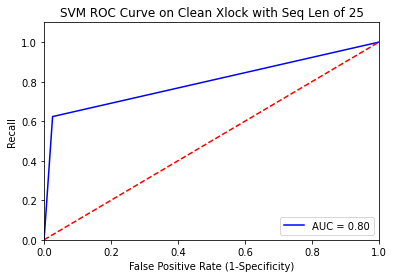

Test AUC: 0.799


---------------------Testing with 20% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------SVM on unclean data --------------------
Confusion Matrix: 
 [[4155  131]
 [  33   44]]

Testing Accuracy: 0.96
Precision:0.25
Recall: 0.57
False Positive Rate: 0.03

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4286
           1       0.25      0.57      0.35        77

    accuracy                           0.96      4363
   macro avg       0.62      0.77      0.66      4363
weighted avg       0.98      0.96      0.97      4363

AUC: 0.77


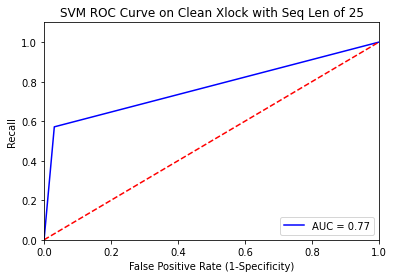

Test AUC: 0.770


---------------------Testing with 15% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------SVM on unclean data --------------------
Confusion Matrix: 
 [[4150  136]
 [  34   43]]

Testing Accuracy: 0.96
Precision:0.24
Recall: 0.56
False Positive Rate: 0.03

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4286
           1       0.24      0.56      0.34        77

    accuracy                           0.96      4363
   macro avg       0.62      0.76      0.66      4363
weighted avg       0.98      0.96      0.97      4363

AUC: 0.76


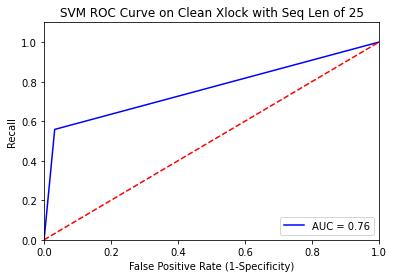

Test AUC: 0.763


---------------------Testing with 45% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------SVM on unclean data --------------------
Confusion Matrix: 
 [[4169  117]
 [  34   43]]

Testing Accuracy: 0.97
Precision:0.27
Recall: 0.56
False Positive Rate: 0.03

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4286
           1       0.27      0.56      0.36        77

    accuracy                           0.97      4363
   macro avg       0.63      0.77      0.67      4363
weighted avg       0.98      0.97      0.97      4363

AUC: 0.77


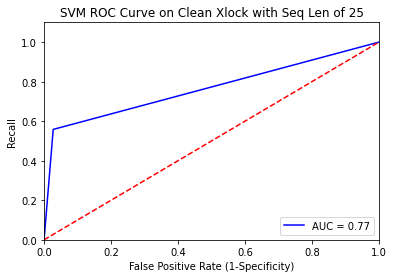

Test AUC: 0.766


---------------------Testing with 90% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------SVM on unclean data --------------------
Confusion Matrix: 
 [[4148  138]
 [  22   55]]

Testing Accuracy: 0.96
Precision:0.28
Recall: 0.71
False Positive Rate: 0.03

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4286
           1       0.28      0.71      0.41        77

    accuracy                           0.96      4363
   macro avg       0.64      0.84      0.69      4363
weighted avg       0.98      0.96      0.97      4363

AUC: 0.84


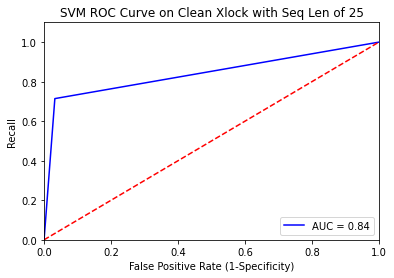

Test AUC: 0.841


---------------------Testing with 50% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------SVM on unclean data --------------------
Confusion Matrix: 
 [[4165  121]
 [  37   40]]

Testing Accuracy: 0.96
Precision:0.25
Recall: 0.52
False Positive Rate: 0.03

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4286
           1       0.25      0.52      0.34        77

    accuracy                           0.96      4363
   macro avg       0.62      0.75      0.66      4363
weighted avg       0.98      0.96      0.97      4363

AUC: 0.75


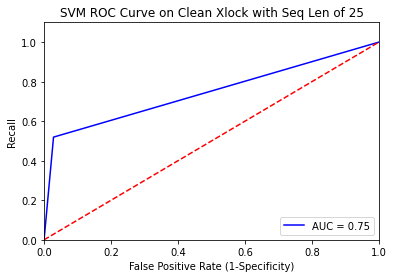

Test AUC: 0.746




In [ ]:
# Test with Duplication 
test_with_duplication(svm_model, 'SVM')

 Plot a heatmap confusion matrix
color_confusion_matrix('SVM', svm_model, x_test, y_test, y_predicted)

# **Neural Net**

This model contains 3 layers: input layer of 6 nodes, a fully connected layer of 6 nodes and an output layer of 2 nodes

In [ ]:
# Scale syscall number to between 0 and 1
# The maximum syscall number in UNM data is 181
max_syscall = 181
x_train_nn = x_train/max_syscall
#clean_x_test_nn = test_clean/max_syscall
#unclean_x_test_nn =  test_unclean/max_syscall

In [ ]:
import tensorflow as tf
from tensorflow import keras
INPUT_SZ = len(x_train.columns)
nn_model = keras.Sequential([
    keras.layers.Input(shape = (INPUT_SZ,)),           # model expect input to be a vector of 6 numbers
    keras.layers.Dense(INPUT_SZ, activation = 'relu'), 
    keras.layers.Dense(2, activation = 'sigmoid')
])

nn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model to training set
history = nn_model.fit(x_train_nn, y_train, epochs=10, batch_size= 32, verbose=1)  

# Save Model
save_models(nn_model,  'NN')

Epoch 1/10
1076/1076 [==============================] - 2s 1ms/step - loss: 0.4346 - accuracy: 0.8199
Epoch 2/10
1076/1076 [==============================] - 2s 1ms/step - loss: 0.3094 - accuracy: 0.8752
Epoch 3/10
1076/1076 [==============================] - 2s 1ms/step - loss: 0.2667 - accuracy: 0.8992
Epoch 4/10
1076/1076 [==============================] - 2s 1ms/step - loss: 0.2432 - accuracy: 0.9127
Epoch 5/10
1076/1076 [==============================] - 2s 1ms/step - loss: 0.2260 - accuracy: 0.9217
Epoch 6/10
1076/1076 [==============================] - 2s 1ms/step - loss: 0.2135 - accuracy: 0.9288
Epoch 7/10
1076/1076 [==============================] - 2s 1ms/step - loss: 0.2050 - accuracy: 0.9362
Epoch 8/10
1076/1076 [==============================] - 2s 1ms/step - loss: 0.1973 - accuracy: 0.9413
Epoch 9/10
1076/1076 [==============================] - 2s 1ms/step - loss: 0.1916 - accuracy: 0.9439
Epoch 10/10
1076/1076 [==============================] - 2s 1ms/step - loss: 0.186

testing NN model
--------------------NN on clean data --------------------
Confusion Matrix: 
 [[3944  342]
 [  22   55]]

Testing Accuracy: 0.92
Precision:0.14
Recall: 0.71
False Positive Rate: 0.08

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.96      4286
           1       0.14      0.71      0.23        77

    accuracy                           0.92      4363
   macro avg       0.57      0.82      0.59      4363
weighted avg       0.98      0.92      0.94      4363

AUC: 0.82


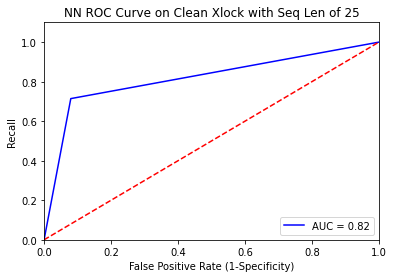

Test AUC: 0.817



testing NN model
--------------------NN on unclean data --------------------
Confusion Matrix: 
 [[4173  368]
 [  39   79]]

Testing Accuracy: 0.91
Precision:0.18
Recall: 0.67
False Positive Rate: 0.08

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      4541
           1       0.18      0.67      0.28       118

    accuracy                           0.91      4659
   macro avg       0.58      0.79      0.62      4659
weighted avg       0.97      0.91      0.94      4659

AUC: 0.79


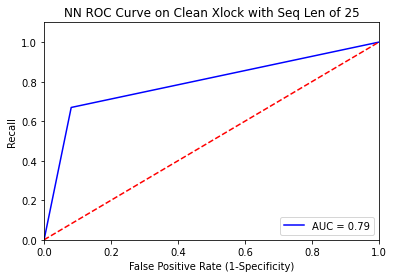

Test AUC: 0.794


In [ ]:
# Get predicted Training labels
#y_pred = np.argmax(nn_model.predict(x_train_nn), axis=-1)

## TESTING NN with clean data and unclean data
NN_clean_perf   = test_model(test_clean,   y_test_clean,   nn_model, 'NN', 'clean', dup_status=0); print('\n\n')
NN_unclean_perf = test_model(test_unclean, y_test_unclean, nn_model, 'NN', 'unclean', dup_status= 101)

In [ ]:
nn_model.summary()

#history.history

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                650       
                                                                 
 dense_1 (Dense)             (None, 2)                 52        
                                                                 
Total params: 702
Trainable params: 702
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Save performance to text file
write_to_file(NN_clean_perf, 'NN', 'clean')
write_to_file(NN_unclean_perf, 'NN', 'unclean')

---------------------Testing with 60% duplication---------------------
testing NN model
--------------------NN on unclean data --------------------
Confusion Matrix: 
 [[3937  349]
 [  18   59]]

Testing Accuracy: 0.92
Precision:0.14
Recall: 0.77
False Positive Rate: 0.08

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      4286
           1       0.14      0.77      0.24        77

    accuracy                           0.92      4363
   macro avg       0.57      0.84      0.60      4363
weighted avg       0.98      0.92      0.94      4363

AUC: 0.84


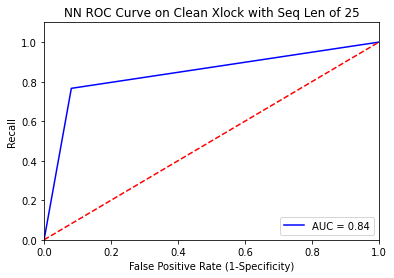

Test AUC: 0.842


---------------------Testing with 30% duplication---------------------
testing NN model
--------------------NN on unclean data --------------------
Confusion Matrix: 
 [[3934  352]
 [  22   55]]

Testing Accuracy: 0.91
Precision:0.14
Recall: 0.71
False Positive Rate: 0.08

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      4286
           1       0.14      0.71      0.23        77

    accuracy                           0.91      4363
   macro avg       0.56      0.82      0.59      4363
weighted avg       0.98      0.91      0.94      4363

AUC: 0.82


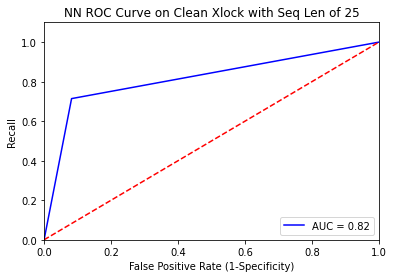

Test AUC: 0.816


---------------------Testing with 95% duplication---------------------
testing NN model
--------------------NN on unclean data --------------------
Confusion Matrix: 
 [[3767  519]
 [  14   63]]

Testing Accuracy: 0.88
Precision:0.11
Recall: 0.82
False Positive Rate: 0.12

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93      4286
           1       0.11      0.82      0.19        77

    accuracy                           0.88      4363
   macro avg       0.55      0.85      0.56      4363
weighted avg       0.98      0.88      0.92      4363

AUC: 0.85


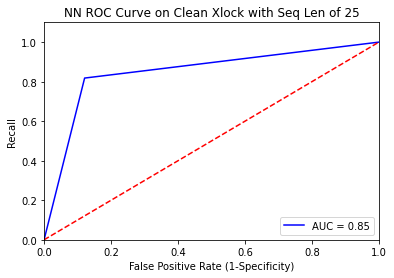

Test AUC: 0.849


---------------------Testing with 55% duplication---------------------
testing NN model
--------------------NN on unclean data --------------------
Confusion Matrix: 
 [[3974  312]
 [  11   66]]

Testing Accuracy: 0.93
Precision:0.17
Recall: 0.86
False Positive Rate: 0.07

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      4286
           1       0.17      0.86      0.29        77

    accuracy                           0.93      4363
   macro avg       0.59      0.89      0.63      4363
weighted avg       0.98      0.93      0.95      4363

AUC: 0.89


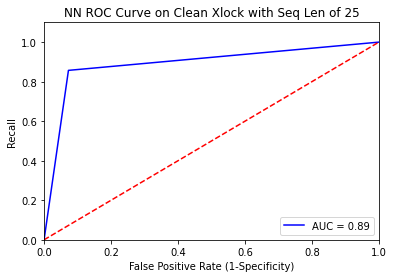

Test AUC: 0.892


---------------------Testing with 25% duplication---------------------
testing NN model
--------------------NN on unclean data --------------------
Confusion Matrix: 
 [[3932  354]
 [  24   53]]

Testing Accuracy: 0.91
Precision:0.13
Recall: 0.69
False Positive Rate: 0.08

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      4286
           1       0.13      0.69      0.22        77

    accuracy                           0.91      4363
   macro avg       0.56      0.80      0.59      4363
weighted avg       0.98      0.91      0.94      4363

AUC: 0.80


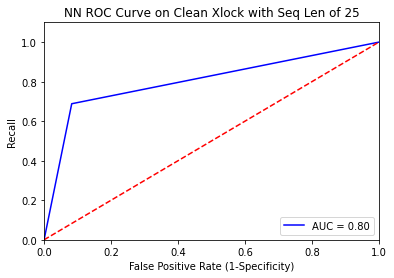

Test AUC: 0.803


---------------------Testing with 85% duplication---------------------
testing NN model
--------------------NN on unclean data --------------------
Confusion Matrix: 
 [[3989  297]
 [  12   65]]

Testing Accuracy: 0.93
Precision:0.18
Recall: 0.84
False Positive Rate: 0.07

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      4286
           1       0.18      0.84      0.30        77

    accuracy                           0.93      4363
   macro avg       0.59      0.89      0.63      4363
weighted avg       0.98      0.93      0.95      4363

AUC: 0.89


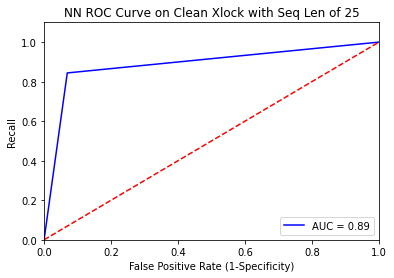

Test AUC: 0.887


---------------------Testing with 70% duplication---------------------
testing NN model
--------------------NN on unclean data --------------------
Confusion Matrix: 
 [[3914  372]
 [  27   50]]

Testing Accuracy: 0.91
Precision:0.12
Recall: 0.65
False Positive Rate: 0.09

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      4286
           1       0.12      0.65      0.20        77

    accuracy                           0.91      4363
   macro avg       0.56      0.78      0.58      4363
weighted avg       0.98      0.91      0.94      4363

AUC: 0.78


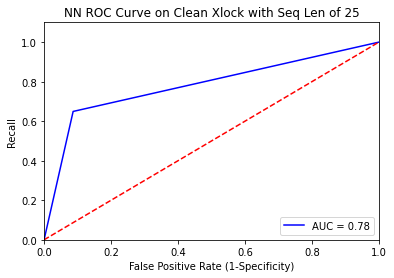

Test AUC: 0.781


---------------------Testing with 75% duplication---------------------
testing NN model
--------------------NN on unclean data --------------------
Confusion Matrix: 
 [[3955  331]
 [  21   56]]

Testing Accuracy: 0.92
Precision:0.14
Recall: 0.73
False Positive Rate: 0.08

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.96      4286
           1       0.14      0.73      0.24        77

    accuracy                           0.92      4363
   macro avg       0.57      0.83      0.60      4363
weighted avg       0.98      0.92      0.94      4363

AUC: 0.83


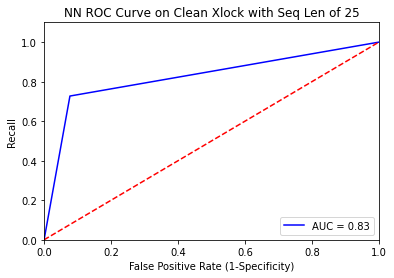

Test AUC: 0.825


---------------------Testing with 10% duplication---------------------
testing NN model
--------------------NN on unclean data --------------------
Confusion Matrix: 
 [[3943  343]
 [  21   56]]

Testing Accuracy: 0.92
Precision:0.14
Recall: 0.73
False Positive Rate: 0.08

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.96      4286
           1       0.14      0.73      0.24        77

    accuracy                           0.92      4363
   macro avg       0.57      0.82      0.60      4363
weighted avg       0.98      0.92      0.94      4363

AUC: 0.82


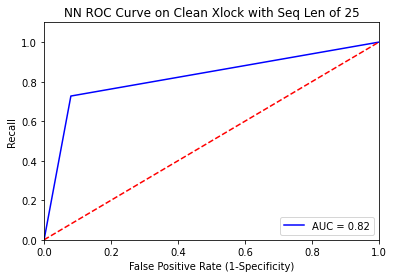

Test AUC: 0.824


---------------------Testing with 40% duplication---------------------
testing NN model
--------------------NN on unclean data --------------------
Confusion Matrix: 
 [[3936  350]
 [  19   58]]

Testing Accuracy: 0.92
Precision:0.14
Recall: 0.75
False Positive Rate: 0.08

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      4286
           1       0.14      0.75      0.24        77

    accuracy                           0.92      4363
   macro avg       0.57      0.84      0.60      4363
weighted avg       0.98      0.92      0.94      4363

AUC: 0.84


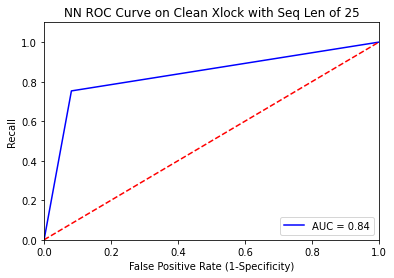

Test AUC: 0.836


---------------------Testing with 65% duplication---------------------
testing NN model
--------------------NN on unclean data --------------------
Confusion Matrix: 
 [[3926  360]
 [  21   56]]

Testing Accuracy: 0.91
Precision:0.13
Recall: 0.73
False Positive Rate: 0.08

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      4286
           1       0.13      0.73      0.23        77

    accuracy                           0.91      4363
   macro avg       0.56      0.82      0.59      4363
weighted avg       0.98      0.91      0.94      4363

AUC: 0.82


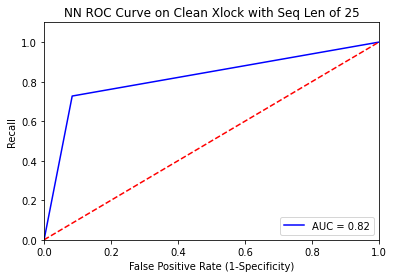

Test AUC: 0.822


---------------------Testing with 5% duplication---------------------
testing NN model
--------------------NN on unclean data --------------------
Confusion Matrix: 
 [[3946  340]
 [  21   56]]

Testing Accuracy: 0.92
Precision:0.14
Recall: 0.73
False Positive Rate: 0.08

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.96      4286
           1       0.14      0.73      0.24        77

    accuracy                           0.92      4363
   macro avg       0.57      0.82      0.60      4363
weighted avg       0.98      0.92      0.94      4363

AUC: 0.82


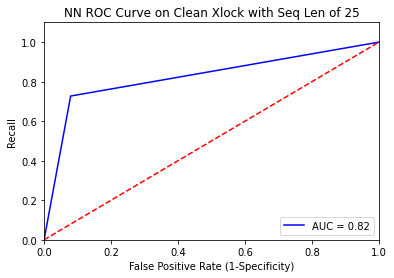

Test AUC: 0.824


---------------------Testing with 35% duplication---------------------
testing NN model
--------------------NN on unclean data --------------------
Confusion Matrix: 
 [[3951  335]
 [  23   54]]

Testing Accuracy: 0.92
Precision:0.14
Recall: 0.70
False Positive Rate: 0.08

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.96      4286
           1       0.14      0.70      0.23        77

    accuracy                           0.92      4363
   macro avg       0.57      0.81      0.59      4363
weighted avg       0.98      0.92      0.94      4363

AUC: 0.81


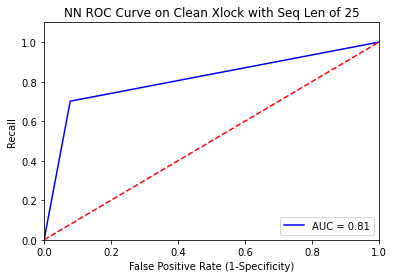

Test AUC: 0.812


---------------------Testing with 80% duplication---------------------
testing NN model
--------------------NN on unclean data --------------------
Confusion Matrix: 
 [[4006  280]
 [   3   74]]

Testing Accuracy: 0.94
Precision:0.21
Recall: 0.96
False Positive Rate: 0.07

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97      4286
           1       0.21      0.96      0.34        77

    accuracy                           0.94      4363
   macro avg       0.60      0.95      0.65      4363
weighted avg       0.99      0.94      0.95      4363

AUC: 0.95


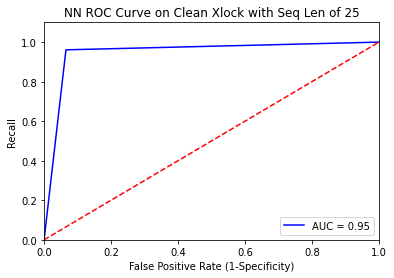

Test AUC: 0.948


---------------------Testing with 20% duplication---------------------
testing NN model
--------------------NN on unclean data --------------------
Confusion Matrix: 
 [[3919  367]
 [  25   52]]

Testing Accuracy: 0.91
Precision:0.12
Recall: 0.68
False Positive Rate: 0.09

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      4286
           1       0.12      0.68      0.21        77

    accuracy                           0.91      4363
   macro avg       0.56      0.79      0.58      4363
weighted avg       0.98      0.91      0.94      4363

AUC: 0.79


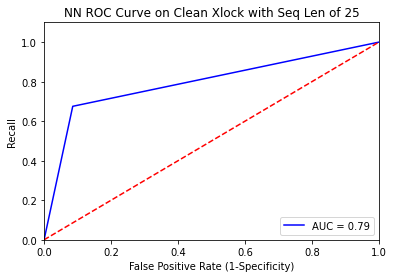

Test AUC: 0.795


---------------------Testing with 15% duplication---------------------
testing NN model
--------------------NN on unclean data --------------------
Confusion Matrix: 
 [[3938  348]
 [  21   56]]

Testing Accuracy: 0.92
Precision:0.14
Recall: 0.73
False Positive Rate: 0.08

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.96      4286
           1       0.14      0.73      0.23        77

    accuracy                           0.92      4363
   macro avg       0.57      0.82      0.59      4363
weighted avg       0.98      0.92      0.94      4363

AUC: 0.82


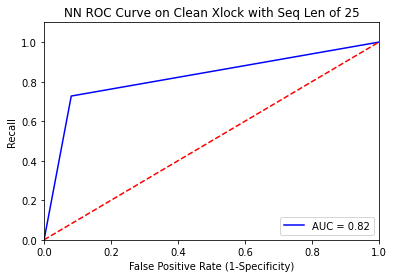

Test AUC: 0.823


---------------------Testing with 45% duplication---------------------
testing NN model
--------------------NN on unclean data --------------------
Confusion Matrix: 
 [[3974  312]
 [  26   51]]

Testing Accuracy: 0.92
Precision:0.14
Recall: 0.66
False Positive Rate: 0.07

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      4286
           1       0.14      0.66      0.23        77

    accuracy                           0.92      4363
   macro avg       0.57      0.79      0.60      4363
weighted avg       0.98      0.92      0.95      4363

AUC: 0.79


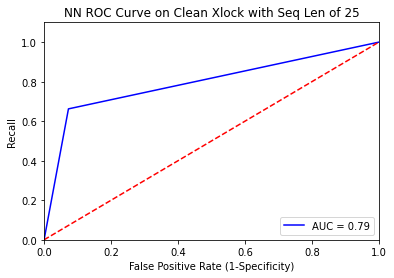

Test AUC: 0.795


---------------------Testing with 90% duplication---------------------
testing NN model
--------------------NN on unclean data --------------------
Confusion Matrix: 
 [[3978  308]
 [  22   55]]

Testing Accuracy: 0.92
Precision:0.15
Recall: 0.71
False Positive Rate: 0.07

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      4286
           1       0.15      0.71      0.25        77

    accuracy                           0.92      4363
   macro avg       0.57      0.82      0.61      4363
weighted avg       0.98      0.92      0.95      4363

AUC: 0.82


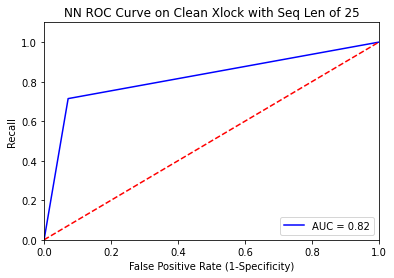

Test AUC: 0.821


---------------------Testing with 50% duplication---------------------
testing NN model
--------------------NN on unclean data --------------------
Confusion Matrix: 
 [[3934  352]
 [  17   60]]

Testing Accuracy: 0.92
Precision:0.15
Recall: 0.78
False Positive Rate: 0.08

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      4286
           1       0.15      0.78      0.25        77

    accuracy                           0.92      4363
   macro avg       0.57      0.85      0.60      4363
weighted avg       0.98      0.92      0.94      4363

AUC: 0.85


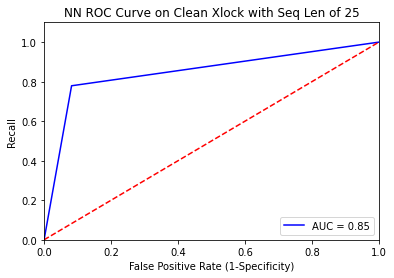

Test AUC: 0.849




In [ ]:
# Test with Duplication  
test_with_duplication(nn_model, 'NN')

# **Decision Tree**

This model uses GINI criterion to split the data and requires at least 10 observations to split and 5 observations in the leaf.

--------------------DT on clean data --------------------
Confusion Matrix: 
 [[4243   43]
 [  19   58]]

Testing Accuracy: 0.99
Precision:0.57
Recall: 0.75
False Positive Rate: 0.01

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4286
           1       0.57      0.75      0.65        77

    accuracy                           0.99      4363
   macro avg       0.78      0.87      0.82      4363
weighted avg       0.99      0.99      0.99      4363

AUC: 0.87


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


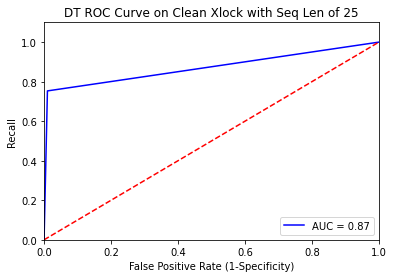

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Test AUC: 0.872



--------------------DT on unclean data --------------------
Confusion Matrix: 
 [[4498   43]
 [  35   83]]

Testing Accuracy: 0.98
Precision:0.66
Recall: 0.70
False Positive Rate: 0.01

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4541
           1       0.66      0.70      0.68       118

    accuracy                           0.98      4659
   macro avg       0.83      0.85      0.84      4659
weighted avg       0.98      0.98      0.98      4659

AUC: 0.85


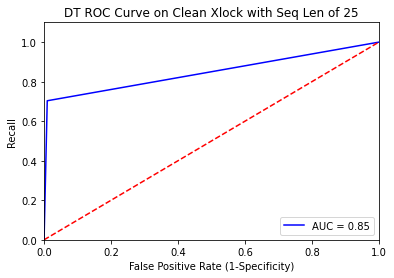

Test AUC: 0.847


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create and Train DecTree model
decTree = DecisionTreeClassifier(criterion='gini', min_samples_split=10,min_samples_leaf=5,max_features='auto')
decTree = decTree.fit(x_train, y_train)

# Save Model
save_models(decTree,   'DT')

## TESTING DT with clean data and unclean data
DT_clean_perf   = test_model(test_clean,   y_test_clean,   decTree, 'DT', 'clean', dup_status=0); print('\n\n')
DT_unclean_perf = test_model(test_unclean, y_test_unclean, decTree, 'DT', 'unclean', dup_status=101)

# Save performance to text file
write_to_file( DT_clean_perf, 'DT', 'clean')
write_to_file( DT_unclean_perf, 'DT', 'unclean')


---------------------Testing with 60% duplication---------------------
--------------------DT on unclean data --------------------
Confusion Matrix: 
 [[4248   38]
 [  15   62]]

Testing Accuracy: 0.99
Precision:0.62
Recall: 0.81
False Positive Rate: 0.01

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4286
           1       0.62      0.81      0.70        77

    accuracy                           0.99      4363
   macro avg       0.81      0.90      0.85      4363
weighted avg       0.99      0.99      0.99      4363

AUC: 0.90


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


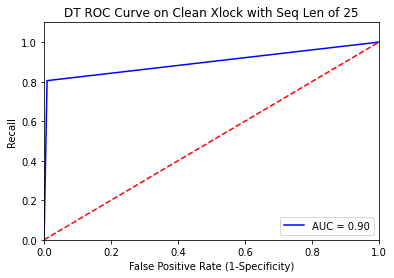

Test AUC: 0.898


---------------------Testing with 30% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------DT on unclean data --------------------
Confusion Matrix: 
 [[4246   40]
 [  19   58]]

Testing Accuracy: 0.99
Precision:0.59
Recall: 0.75
False Positive Rate: 0.01

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4286
           1       0.59      0.75      0.66        77

    accuracy                           0.99      4363
   macro avg       0.79      0.87      0.83      4363
weighted avg       0.99      0.99      0.99      4363

AUC: 0.87


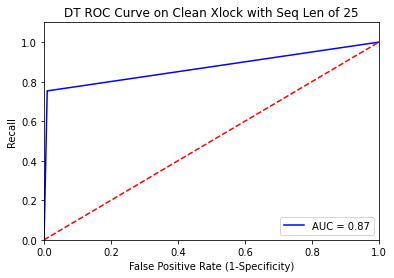

Test AUC: 0.872


---------------------Testing with 95% duplication---------------------
--------------------DT on unclean data --------------------
Confusion Matrix: 
 [[4227   59]
 [   0   77]]

Testing Accuracy: 0.99
Precision:0.57
Recall: 1.00
False Positive Rate: 0.01

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4286
           1       0.57      1.00      0.72        77

    accuracy                           0.99      4363
   macro avg       0.78      0.99      0.86      4363
weighted avg       0.99      0.99      0.99      4363

AUC: 0.99


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


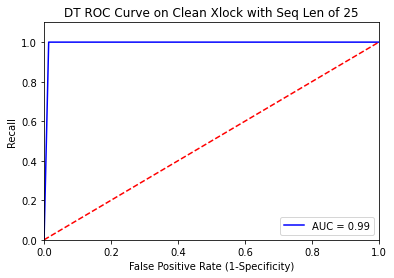

Test AUC: 0.993


---------------------Testing with 55% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------DT on unclean data --------------------
Confusion Matrix: 
 [[4251   35]
 [  16   61]]

Testing Accuracy: 0.99
Precision:0.64
Recall: 0.79
False Positive Rate: 0.01

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4286
           1       0.64      0.79      0.71        77

    accuracy                           0.99      4363
   macro avg       0.82      0.89      0.85      4363
weighted avg       0.99      0.99      0.99      4363

AUC: 0.89


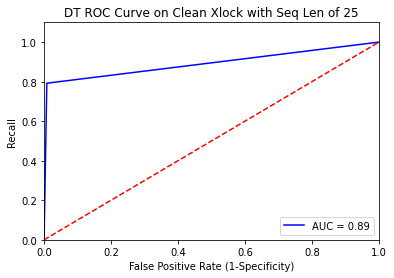

Test AUC: 0.892


---------------------Testing with 25% duplication---------------------
--------------------DT on unclean data --------------------
Confusion Matrix: 
 [[4245   41]
 [  24   53]]

Testing Accuracy: 0.99
Precision:0.56
Recall: 0.69
False Positive Rate: 0.01

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4286
           1       0.56      0.69      0.62        77

    accuracy                           0.99      4363
   macro avg       0.78      0.84      0.81      4363
weighted avg       0.99      0.99      0.99      4363

AUC: 0.84


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


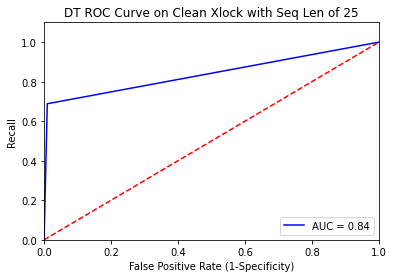

Test AUC: 0.839


---------------------Testing with 85% duplication---------------------
--------------------DT on unclean data --------------------
Confusion Matrix: 
 [[4243   43]
 [  13   64]]

Testing Accuracy: 0.99
Precision:0.60
Recall: 0.83
False Positive Rate: 0.01

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4286
           1       0.60      0.83      0.70        77

    accuracy                           0.99      4363
   macro avg       0.80      0.91      0.84      4363
weighted avg       0.99      0.99      0.99      4363

AUC: 0.91


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


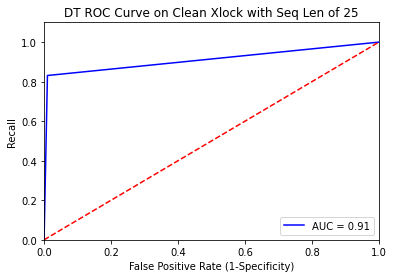

Test AUC: 0.911


---------------------Testing with 70% duplication---------------------
--------------------DT on unclean data --------------------
Confusion Matrix: 
 [[4233   53]
 [  19   58]]

Testing Accuracy: 0.98
Precision:0.52
Recall: 0.75
False Positive Rate: 0.01

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4286
           1       0.52      0.75      0.62        77

    accuracy                           0.98      4363
   macro avg       0.76      0.87      0.80      4363
weighted avg       0.99      0.98      0.98      4363

AUC: 0.87


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


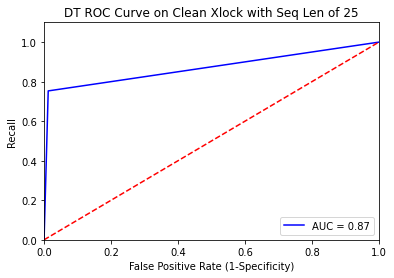

Test AUC: 0.870


---------------------Testing with 75% duplication---------------------
--------------------DT on unclean data --------------------
Confusion Matrix: 
 [[4245   41]
 [  27   50]]

Testing Accuracy: 0.98
Precision:0.55
Recall: 0.65
False Positive Rate: 0.01

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4286
           1       0.55      0.65      0.60        77

    accuracy                           0.98      4363
   macro avg       0.77      0.82      0.79      4363
weighted avg       0.99      0.98      0.99      4363

AUC: 0.82


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


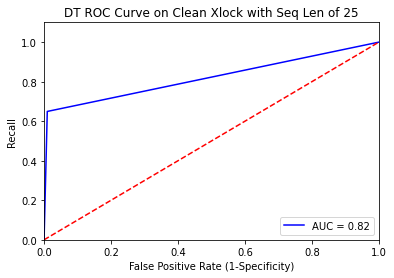

Test AUC: 0.820


---------------------Testing with 10% duplication---------------------
--------------------DT on unclean data --------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Confusion Matrix: 
 [[4241   45]
 [  20   57]]

Testing Accuracy: 0.99
Precision:0.56
Recall: 0.74
False Positive Rate: 0.01

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4286
           1       0.56      0.74      0.64        77

    accuracy                           0.99      4363
   macro avg       0.78      0.86      0.81      4363
weighted avg       0.99      0.99      0.99      4363

AUC: 0.86


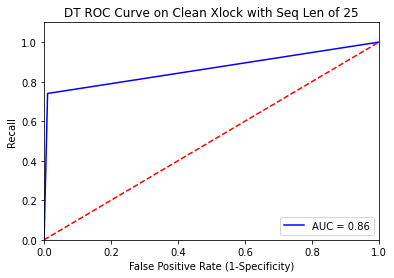

Test AUC: 0.865


---------------------Testing with 40% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------DT on unclean data --------------------
Confusion Matrix: 
 [[4255   31]
 [  19   58]]

Testing Accuracy: 0.99
Precision:0.65
Recall: 0.75
False Positive Rate: 0.01

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4286
           1       0.65      0.75      0.70        77

    accuracy                           0.99      4363
   macro avg       0.82      0.87      0.85      4363
weighted avg       0.99      0.99      0.99      4363

AUC: 0.87


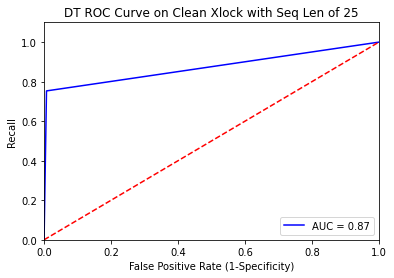

Test AUC: 0.873


---------------------Testing with 65% duplication---------------------
--------------------DT on unclean data --------------------
Confusion Matrix: 
 [[4237   49]
 [  22   55]]

Testing Accuracy: 0.98
Precision:0.53
Recall: 0.71
False Positive Rate: 0.01

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4286
           1       0.53      0.71      0.61        77

    accuracy                           0.98      4363
   macro avg       0.76      0.85      0.80      4363
weighted avg       0.99      0.98      0.98      4363

AUC: 0.85


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


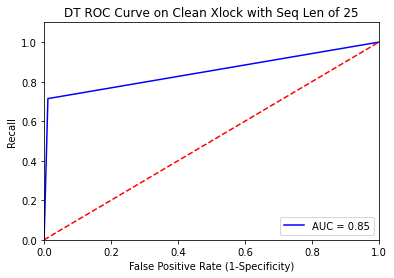

Test AUC: 0.851


---------------------Testing with 5% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------DT on unclean data --------------------
Confusion Matrix: 
 [[4245   41]
 [  18   59]]

Testing Accuracy: 0.99
Precision:0.59
Recall: 0.77
False Positive Rate: 0.01

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4286
           1       0.59      0.77      0.67        77

    accuracy                           0.99      4363
   macro avg       0.79      0.88      0.83      4363
weighted avg       0.99      0.99      0.99      4363

AUC: 0.88


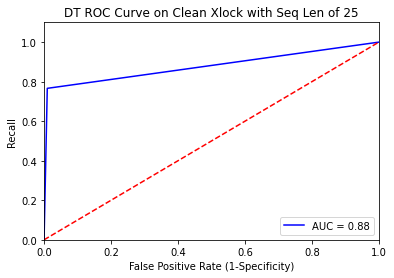

Test AUC: 0.878


---------------------Testing with 35% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------DT on unclean data --------------------
Confusion Matrix: 
 [[4245   41]
 [  18   59]]

Testing Accuracy: 0.99
Precision:0.59
Recall: 0.77
False Positive Rate: 0.01

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4286
           1       0.59      0.77      0.67        77

    accuracy                           0.99      4363
   macro avg       0.79      0.88      0.83      4363
weighted avg       0.99      0.99      0.99      4363

AUC: 0.88


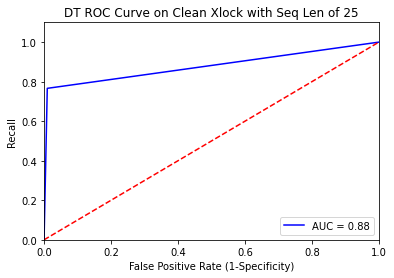

Test AUC: 0.878


---------------------Testing with 80% duplication---------------------
--------------------DT on unclean data --------------------
Confusion Matrix: 
 [[4267   19]
 [   7   70]]

Testing Accuracy: 0.99
Precision:0.79
Recall: 0.91
False Positive Rate: 0.00

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4286
           1       0.79      0.91      0.84        77

    accuracy                           0.99      4363
   macro avg       0.89      0.95      0.92      4363
weighted avg       0.99      0.99      0.99      4363

AUC: 0.95


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


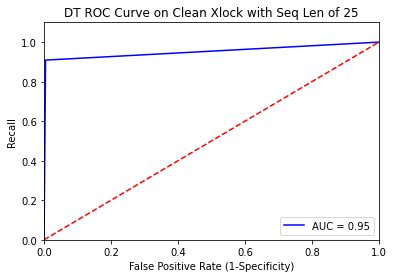

Test AUC: 0.952


---------------------Testing with 20% duplication---------------------
--------------------DT on unclean data --------------------
Confusion Matrix: 
 [[4241   45]
 [  18   59]]

Testing Accuracy: 0.99
Precision:0.57
Recall: 0.77
False Positive Rate: 0.01

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4286
           1       0.57      0.77      0.65        77

    accuracy                           0.99      4363
   macro avg       0.78      0.88      0.82      4363
weighted avg       0.99      0.99      0.99      4363

AUC: 0.88


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


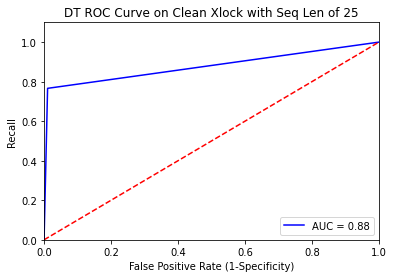

Test AUC: 0.878


---------------------Testing with 15% duplication---------------------
--------------------DT on unclean data --------------------
Confusion Matrix: 
 [[4243   43]
 [  17   60]]

Testing Accuracy: 0.99
Precision:0.58
Recall: 0.78
False Positive Rate: 0.01

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4286
           1       0.58      0.78      0.67        77

    accuracy                           0.99      4363
   macro avg       0.79      0.88      0.83      4363
weighted avg       0.99      0.99      0.99      4363

AUC: 0.88


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


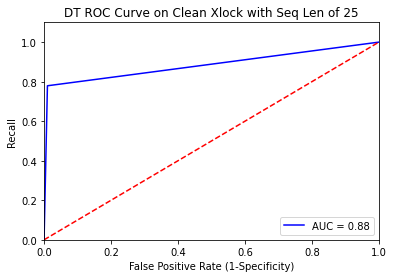

Test AUC: 0.885


---------------------Testing with 45% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------DT on unclean data --------------------
Confusion Matrix: 
 [[4242   44]
 [  24   53]]

Testing Accuracy: 0.98
Precision:0.55
Recall: 0.69
False Positive Rate: 0.01

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4286
           1       0.55      0.69      0.61        77

    accuracy                           0.98      4363
   macro avg       0.77      0.84      0.80      4363
weighted avg       0.99      0.98      0.99      4363

AUC: 0.84


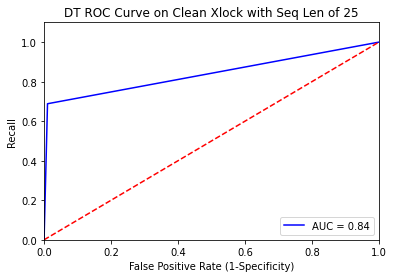

Test AUC: 0.839


---------------------Testing with 90% duplication---------------------
--------------------DT on unclean data --------------------
Confusion Matrix: 
 [[4226   60]
 [   0   77]]

Testing Accuracy: 0.99
Precision:0.56
Recall: 1.00
False Positive Rate: 0.01

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4286
           1       0.56      1.00      0.72        77

    accuracy                           0.99      4363
   macro avg       0.78      0.99      0.86      4363
weighted avg       0.99      0.99      0.99      4363

AUC: 0.99


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


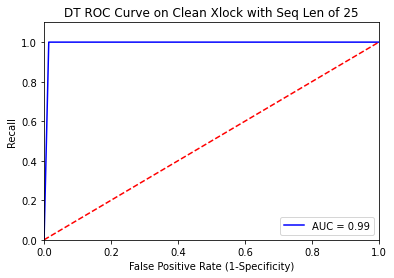

Test AUC: 0.993


---------------------Testing with 50% duplication---------------------
--------------------DT on unclean data --------------------
Confusion Matrix: 
 [[4255   31]
 [  10   67]]

Testing Accuracy: 0.99
Precision:0.68
Recall: 0.87
False Positive Rate: 0.01

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4286
           1       0.68      0.87      0.77        77

    accuracy                           0.99      4363
   macro avg       0.84      0.93      0.88      4363
weighted avg       0.99      0.99      0.99      4363

AUC: 0.93


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


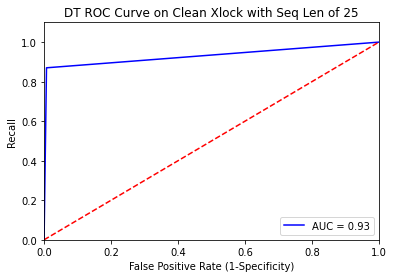

Test AUC: 0.931




In [ ]:
# Test with Duplication 
test_with_duplication(decTree, 'DT')

# **Random Forest**

This model has no max depth and allows bootstrapping observations during training. It uses GINI criterion to split and requires a minimum of 10 observations to split and the leaf node must have above 5 observations.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------RF on clean data --------------------
Confusion Matrix: 
 [[4268   18]
 [  15   62]]

Testing Accuracy: 0.99
Precision:0.78
Recall: 0.81
False Positive Rate: 0.00

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4286
           1       0.78      0.81      0.79        77

    accuracy                           0.99      4363
   macro avg       0.89      0.90      0.89      4363
weighted avg       0.99      0.99      0.99      4363

AUC: 0.90


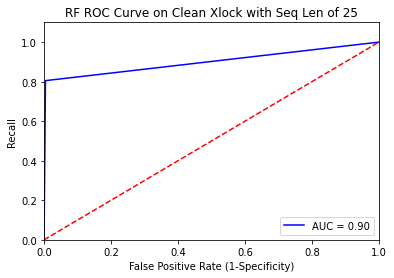

Test AUC: 0.900



--------------------RF on unclean data --------------------
Confusion Matrix: 
 [[4523   18]
 [  30   88]]

Testing Accuracy: 0.99
Precision:0.83
Recall: 0.75
False Positive Rate: 0.00

Classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4541
           1       0.83      0.75      0.79       118

    accuracy                           0.99      4659
   macro avg       0.91      0.87      0.89      4659
weighted avg       0.99      0.99      0.99      4659

AUC: 0.87


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


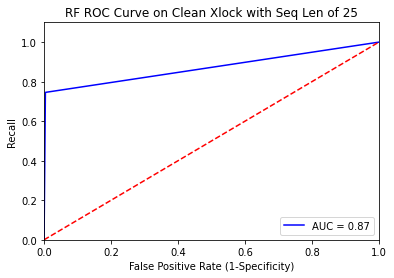

Test AUC: 0.871


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Build model
randomForest = RandomForestClassifier(max_depth=None, min_samples_split=10, min_samples_leaf=5, 
                                      max_features='auto', bootstrap=True,verbose=0, criterion='gini')
# Train the model with training set
randomForest.fit(x_train, y_train)

# Save Model
save_models(randomForest, 'RF')

## TESTING RF with clean data and unclean data
RF_clean_perf   = test_model(test_clean,   y_test_clean,   randomForest, 'RF', 'clean', dup_status=0); print('\n\n')
RF_unclean_perf = test_model(test_unclean, y_test_unclean, randomForest, 'RF', 'unclean', dup_status= 101)


# Save performance to text file
write_to_file( RF_clean_perf, 'RF', 'clean')
write_to_file( RF_unclean_perf, 'RF', 'unclean')

---------------------Testing with 60% duplication---------------------
--------------------RF on unclean data --------------------
Confusion Matrix: 
 [[4268   18]
 [  12   65]]

Testing Accuracy: 0.99
Precision:0.78
Recall: 0.84
False Positive Rate: 0.00

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4286
           1       0.78      0.84      0.81        77

    accuracy                           0.99      4363
   macro avg       0.89      0.92      0.90      4363
weighted avg       0.99      0.99      0.99      4363

AUC: 0.92


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


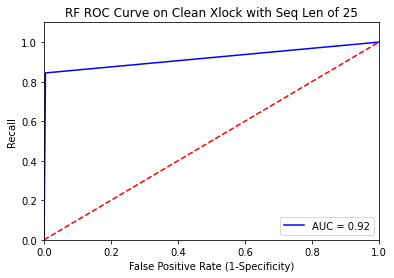

Test AUC: 0.920


---------------------Testing with 30% duplication---------------------
--------------------RF on unclean data --------------------
Confusion Matrix: 
 [[4272   14]
 [  13   64]]

Testing Accuracy: 0.99
Precision:0.82
Recall: 0.83
False Positive Rate: 0.00

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4286
           1       0.82      0.83      0.83        77

    accuracy                           0.99      4363
   macro avg       0.91      0.91      0.91      4363
weighted avg       0.99      0.99      0.99      4363

AUC: 0.91


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


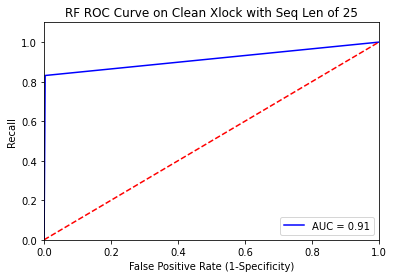

Test AUC: 0.914


---------------------Testing with 95% duplication---------------------
--------------------RF on unclean data --------------------
Confusion Matrix: 
 [[4259   27]
 [   0   77]]

Testing Accuracy: 0.99
Precision:0.74
Recall: 1.00
False Positive Rate: 0.01

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4286
           1       0.74      1.00      0.85        77

    accuracy                           0.99      4363
   macro avg       0.87      1.00      0.92      4363
weighted avg       1.00      0.99      0.99      4363

AUC: 1.00


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


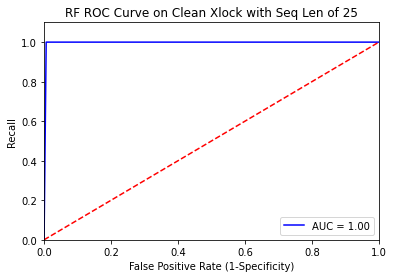

Test AUC: 0.997


---------------------Testing with 55% duplication---------------------
--------------------RF on unclean data --------------------
Confusion Matrix: 
 [[4275   11]
 [   7   70]]

Testing Accuracy: 1.00
Precision:0.86
Recall: 0.91
False Positive Rate: 0.00

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4286
           1       0.86      0.91      0.89        77

    accuracy                           1.00      4363
   macro avg       0.93      0.95      0.94      4363
weighted avg       1.00      1.00      1.00      4363

AUC: 0.95


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


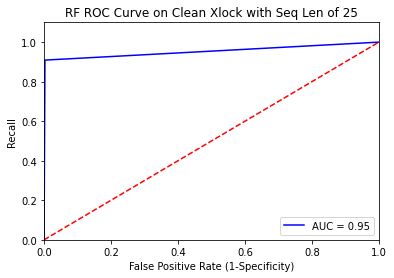

Test AUC: 0.953


---------------------Testing with 25% duplication---------------------
--------------------RF on unclean data --------------------
Confusion Matrix: 
 [[4266   20]
 [  20   57]]

Testing Accuracy: 0.99
Precision:0.74
Recall: 0.74
False Positive Rate: 0.00

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4286
           1       0.74      0.74      0.74        77

    accuracy                           0.99      4363
   macro avg       0.87      0.87      0.87      4363
weighted avg       0.99      0.99      0.99      4363

AUC: 0.87


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


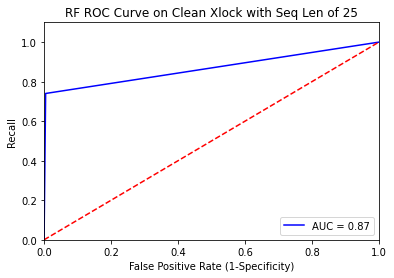

Test AUC: 0.868


---------------------Testing with 85% duplication---------------------
--------------------RF on unclean data --------------------
Confusion Matrix: 
 [[4275   11]
 [   7   70]]

Testing Accuracy: 1.00
Precision:0.86
Recall: 0.91
False Positive Rate: 0.00

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4286
           1       0.86      0.91      0.89        77

    accuracy                           1.00      4363
   macro avg       0.93      0.95      0.94      4363
weighted avg       1.00      1.00      1.00      4363

AUC: 0.95


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


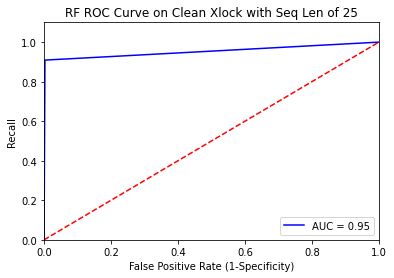

Test AUC: 0.953


---------------------Testing with 70% duplication---------------------
--------------------RF on unclean data --------------------
Confusion Matrix: 
 [[4252   34]
 [  15   62]]

Testing Accuracy: 0.99
Precision:0.65
Recall: 0.81
False Positive Rate: 0.01

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4286
           1       0.65      0.81      0.72        77

    accuracy                           0.99      4363
   macro avg       0.82      0.90      0.86      4363
weighted avg       0.99      0.99      0.99      4363

AUC: 0.90


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


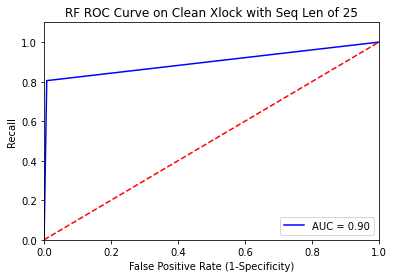

Test AUC: 0.899


---------------------Testing with 75% duplication---------------------
--------------------RF on unclean data --------------------
Confusion Matrix: 
 [[4269   17]
 [  17   60]]

Testing Accuracy: 0.99
Precision:0.78
Recall: 0.78
False Positive Rate: 0.00

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4286
           1       0.78      0.78      0.78        77

    accuracy                           0.99      4363
   macro avg       0.89      0.89      0.89      4363
weighted avg       0.99      0.99      0.99      4363

AUC: 0.89


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


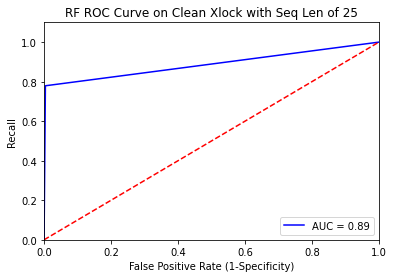

Test AUC: 0.888


---------------------Testing with 10% duplication---------------------
--------------------RF on unclean data --------------------
Confusion Matrix: 
 [[4268   18]
 [  13   64]]

Testing Accuracy: 0.99
Precision:0.78
Recall: 0.83
False Positive Rate: 0.00

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4286
           1       0.78      0.83      0.81        77

    accuracy                           0.99      4363
   macro avg       0.89      0.91      0.90      4363
weighted avg       0.99      0.99      0.99      4363

AUC: 0.91


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


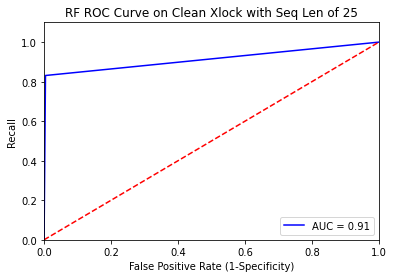

Test AUC: 0.913


---------------------Testing with 40% duplication---------------------
--------------------RF on unclean data --------------------
Confusion Matrix: 
 [[4265   21]
 [  12   65]]

Testing Accuracy: 0.99
Precision:0.76
Recall: 0.84
False Positive Rate: 0.00

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4286
           1       0.76      0.84      0.80        77

    accuracy                           0.99      4363
   macro avg       0.88      0.92      0.90      4363
weighted avg       0.99      0.99      0.99      4363

AUC: 0.92


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


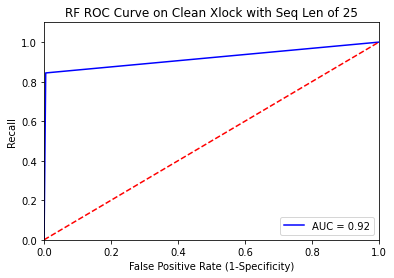

Test AUC: 0.920


---------------------Testing with 65% duplication---------------------
--------------------RF on unclean data --------------------
Confusion Matrix: 
 [[4266   20]
 [  12   65]]

Testing Accuracy: 0.99
Precision:0.76
Recall: 0.84
False Positive Rate: 0.00

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4286
           1       0.76      0.84      0.80        77

    accuracy                           0.99      4363
   macro avg       0.88      0.92      0.90      4363
weighted avg       0.99      0.99      0.99      4363

AUC: 0.92


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


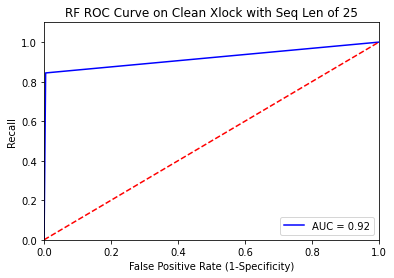

Test AUC: 0.920


---------------------Testing with 5% duplication---------------------
--------------------RF on unclean data --------------------
Confusion Matrix: 
 [[4272   14]
 [  15   62]]

Testing Accuracy: 0.99
Precision:0.82
Recall: 0.81
False Positive Rate: 0.00

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4286
           1       0.82      0.81      0.81        77

    accuracy                           0.99      4363
   macro avg       0.91      0.90      0.90      4363
weighted avg       0.99      0.99      0.99      4363

AUC: 0.90


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


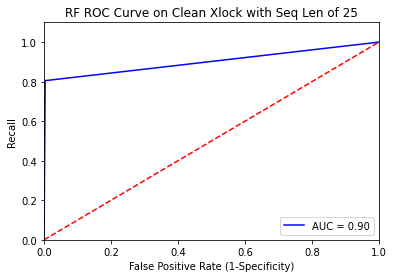

Test AUC: 0.901


---------------------Testing with 35% duplication---------------------
--------------------RF on unclean data --------------------
Confusion Matrix: 
 [[4270   16]
 [  14   63]]

Testing Accuracy: 0.99
Precision:0.80
Recall: 0.82
False Positive Rate: 0.00

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4286
           1       0.80      0.82      0.81        77

    accuracy                           0.99      4363
   macro avg       0.90      0.91      0.90      4363
weighted avg       0.99      0.99      0.99      4363

AUC: 0.91


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


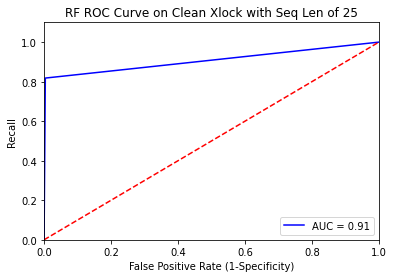

Test AUC: 0.907


---------------------Testing with 80% duplication---------------------
--------------------RF on unclean data --------------------
Confusion Matrix: 
 [[4267   19]
 [   7   70]]

Testing Accuracy: 0.99
Precision:0.79
Recall: 0.91
False Positive Rate: 0.00

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4286
           1       0.79      0.91      0.84        77

    accuracy                           0.99      4363
   macro avg       0.89      0.95      0.92      4363
weighted avg       0.99      0.99      0.99      4363

AUC: 0.95


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


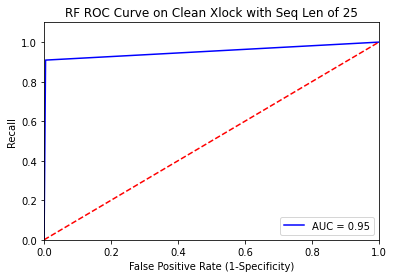

Test AUC: 0.952


---------------------Testing with 20% duplication---------------------
--------------------RF on unclean data --------------------
Confusion Matrix: 
 [[4269   17]
 [  15   62]]

Testing Accuracy: 0.99
Precision:0.78
Recall: 0.81
False Positive Rate: 0.00

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4286
           1       0.78      0.81      0.79        77

    accuracy                           0.99      4363
   macro avg       0.89      0.90      0.90      4363
weighted avg       0.99      0.99      0.99      4363

AUC: 0.90


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


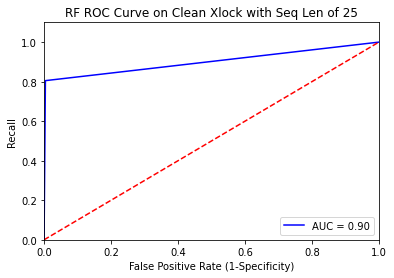

Test AUC: 0.901


---------------------Testing with 15% duplication---------------------
--------------------RF on unclean data --------------------
Confusion Matrix: 
 [[4266   20]
 [  15   62]]

Testing Accuracy: 0.99
Precision:0.76
Recall: 0.81
False Positive Rate: 0.00

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4286
           1       0.76      0.81      0.78        77

    accuracy                           0.99      4363
   macro avg       0.88      0.90      0.89      4363
weighted avg       0.99      0.99      0.99      4363

AUC: 0.90


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


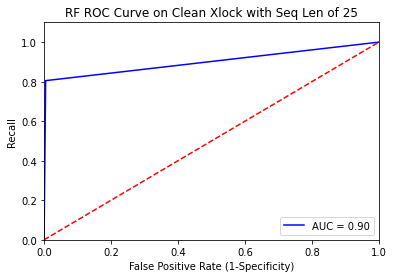

Test AUC: 0.900


---------------------Testing with 45% duplication---------------------
--------------------RF on unclean data --------------------
Confusion Matrix: 
 [[4272   14]
 [  20   57]]

Testing Accuracy: 0.99
Precision:0.80
Recall: 0.74
False Positive Rate: 0.00

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4286
           1       0.80      0.74      0.77        77

    accuracy                           0.99      4363
   macro avg       0.90      0.87      0.88      4363
weighted avg       0.99      0.99      0.99      4363

AUC: 0.87


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


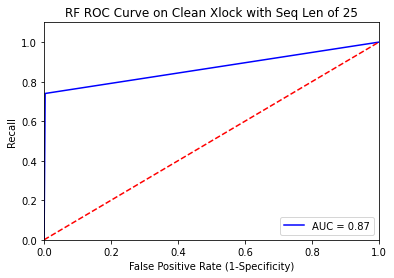

Test AUC: 0.868


---------------------Testing with 90% duplication---------------------
--------------------RF on unclean data --------------------
Confusion Matrix: 
 [[4261   25]
 [  12   65]]

Testing Accuracy: 0.99
Precision:0.72
Recall: 0.84
False Positive Rate: 0.01

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4286
           1       0.72      0.84      0.78        77

    accuracy                           0.99      4363
   macro avg       0.86      0.92      0.89      4363
weighted avg       0.99      0.99      0.99      4363

AUC: 0.92


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


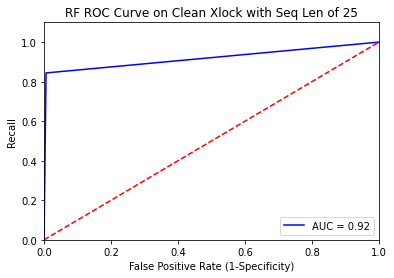

Test AUC: 0.919


---------------------Testing with 50% duplication---------------------
--------------------RF on unclean data --------------------
Confusion Matrix: 
 [[4274   12]
 [  10   67]]

Testing Accuracy: 0.99
Precision:0.85
Recall: 0.87
False Positive Rate: 0.00

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4286
           1       0.85      0.87      0.86        77

    accuracy                           0.99      4363
   macro avg       0.92      0.93      0.93      4363
weighted avg       1.00      0.99      0.99      4363

AUC: 0.93


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


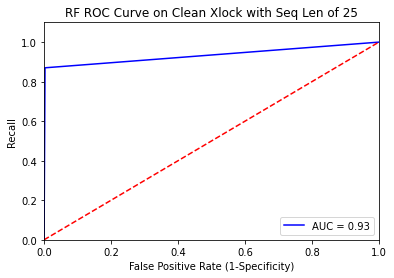

Test AUC: 0.934




In [ ]:
# Test with Duplication 
test_with_duplication(randomForest, 'RF')

# **KNN**

This model classifies each observation based on 3 nearest neighbors with uniform weight.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------KNN on clean data --------------------
Confusion Matrix: 
 [[4203   83]
 [  20   57]]

Testing Accuracy: 0.98
Precision:0.41
Recall: 0.74
False Positive Rate: 0.02

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4286
           1       0.41      0.74      0.53        77

    accuracy                           0.98      4363
   macro avg       0.70      0.86      0.76      4363
weighted avg       0.98      0.98      0.98      4363

AUC: 0.86


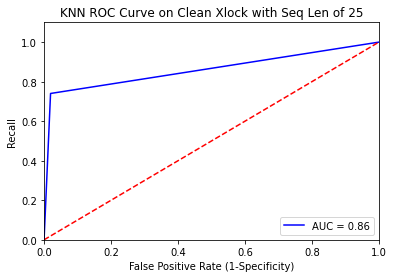

Test AUC: 0.860





/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------KNN on unclean data --------------------
Confusion Matrix: 
 [[4453   88]
 [  39   79]]

Testing Accuracy: 0.97
Precision:0.47
Recall: 0.67
False Positive Rate: 0.02

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4541
           1       0.47      0.67      0.55       118

    accuracy                           0.97      4659
   macro avg       0.73      0.83      0.77      4659
weighted avg       0.98      0.97      0.98      4659

AUC: 0.83


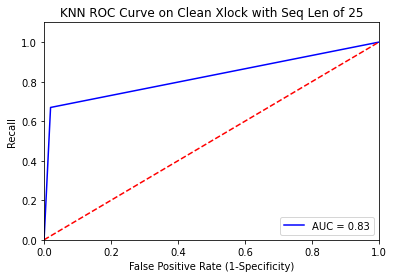

Test AUC: 0.825


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Creat and Train KNN model
KNN = KNeighborsClassifier(n_neighbors=5, weights='uniform')
KNN.fit(svm_x_train, svm_y_train)

# Save Model
save_models(KNN,       'KNN')

## TESTING KNN with clean data and unclean data
KNN_clean_perf   = test_model(test_clean,   y_test_clean,   KNN, 'KNN', 'clean', dup_status=0); print('\n\n')
KNN_unclean_perf = test_model(test_unclean, y_test_unclean, KNN, 'KNN', 'unclean', dup_status= 101)

# Save performance to text file
write_to_file( KNN_clean_perf, 'KNN', 'clean')
write_to_file( KNN_unclean_perf, 'KNN', 'unclean')


---------------------Testing with 60% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------KNN on unclean data --------------------
Confusion Matrix: 
 [[4210   76]
 [  16   61]]

Testing Accuracy: 0.98
Precision:0.45
Recall: 0.79
False Positive Rate: 0.02

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4286
           1       0.45      0.79      0.57        77

    accuracy                           0.98      4363
   macro avg       0.72      0.89      0.78      4363
weighted avg       0.99      0.98      0.98      4363

AUC: 0.89


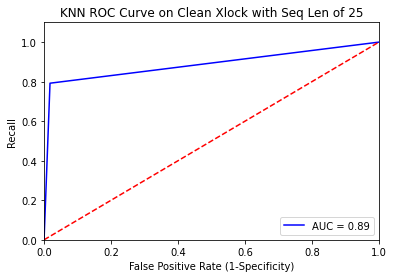

Test AUC: 0.887


---------------------Testing with 30% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------KNN on unclean data --------------------
Confusion Matrix: 
 [[4202   84]
 [  17   60]]

Testing Accuracy: 0.98
Precision:0.42
Recall: 0.78
False Positive Rate: 0.02

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4286
           1       0.42      0.78      0.54        77

    accuracy                           0.98      4363
   macro avg       0.71      0.88      0.77      4363
weighted avg       0.99      0.98      0.98      4363

AUC: 0.88


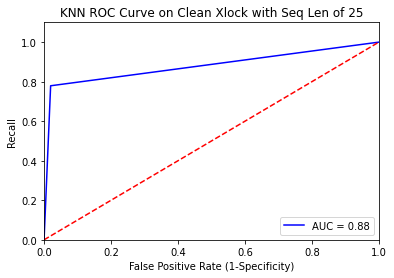

Test AUC: 0.880


---------------------Testing with 95% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------KNN on unclean data --------------------
Confusion Matrix: 
 [[4231   55]
 [   0   77]]

Testing Accuracy: 0.99
Precision:0.58
Recall: 1.00
False Positive Rate: 0.01

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4286
           1       0.58      1.00      0.74        77

    accuracy                           0.99      4363
   macro avg       0.79      0.99      0.87      4363
weighted avg       0.99      0.99      0.99      4363

AUC: 0.99


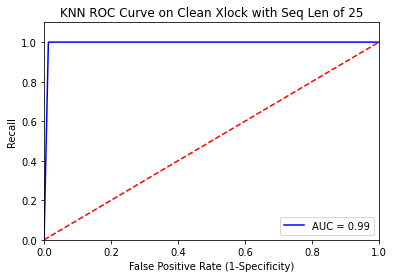

Test AUC: 0.994


---------------------Testing with 55% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------KNN on unclean data --------------------
Confusion Matrix: 
 [[4205   81]
 [   5   72]]

Testing Accuracy: 0.98
Precision:0.47
Recall: 0.94
False Positive Rate: 0.02

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4286
           1       0.47      0.94      0.63        77

    accuracy                           0.98      4363
   macro avg       0.73      0.96      0.81      4363
weighted avg       0.99      0.98      0.98      4363

AUC: 0.96


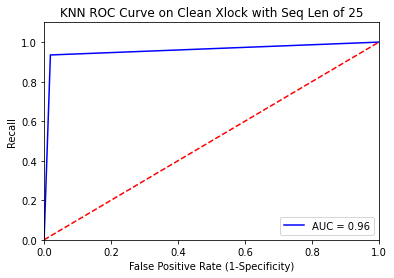

Test AUC: 0.958


---------------------Testing with 25% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------KNN on unclean data --------------------
Confusion Matrix: 
 [[4203   83]
 [  24   53]]

Testing Accuracy: 0.98
Precision:0.39
Recall: 0.69
False Positive Rate: 0.02

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4286
           1       0.39      0.69      0.50        77

    accuracy                           0.98      4363
   macro avg       0.69      0.83      0.74      4363
weighted avg       0.98      0.98      0.98      4363

AUC: 0.83


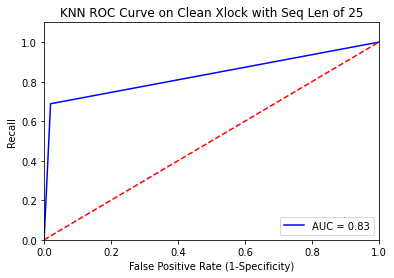

Test AUC: 0.834


---------------------Testing with 85% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------KNN on unclean data --------------------
Confusion Matrix: 
 [[4221   65]
 [   7   70]]

Testing Accuracy: 0.98
Precision:0.52
Recall: 0.91
False Positive Rate: 0.02

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4286
           1       0.52      0.91      0.66        77

    accuracy                           0.98      4363
   macro avg       0.76      0.95      0.83      4363
weighted avg       0.99      0.98      0.99      4363

AUC: 0.95


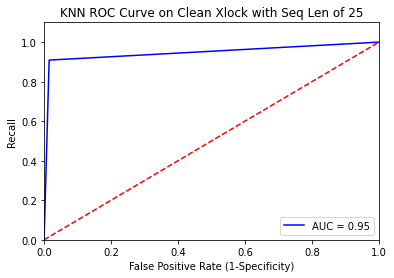

Test AUC: 0.947


---------------------Testing with 70% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------KNN on unclean data --------------------
Confusion Matrix: 
 [[4180  106]
 [  26   51]]

Testing Accuracy: 0.97
Precision:0.32
Recall: 0.66
False Positive Rate: 0.02

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4286
           1       0.32      0.66      0.44        77

    accuracy                           0.97      4363
   macro avg       0.66      0.82      0.71      4363
weighted avg       0.98      0.97      0.97      4363

AUC: 0.82


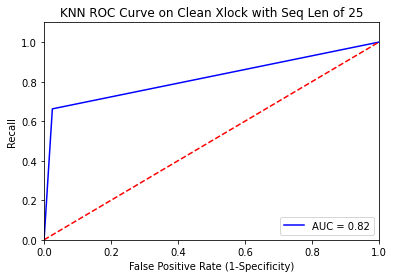

Test AUC: 0.819


---------------------Testing with 75% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------KNN on unclean data --------------------
Confusion Matrix: 
 [[4184  102]
 [  29   48]]

Testing Accuracy: 0.97
Precision:0.32
Recall: 0.62
False Positive Rate: 0.02

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4286
           1       0.32      0.62      0.42        77

    accuracy                           0.97      4363
   macro avg       0.66      0.80      0.70      4363
weighted avg       0.98      0.97      0.97      4363

AUC: 0.80


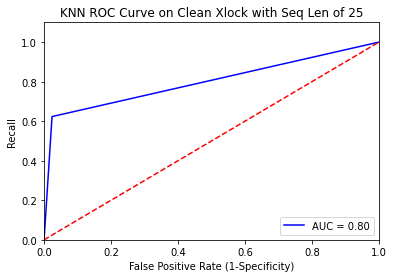

Test AUC: 0.800


---------------------Testing with 10% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------KNN on unclean data --------------------
Confusion Matrix: 
 [[4197   89]
 [  19   58]]

Testing Accuracy: 0.98
Precision:0.39
Recall: 0.75
False Positive Rate: 0.02

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4286
           1       0.39      0.75      0.52        77

    accuracy                           0.98      4363
   macro avg       0.70      0.87      0.75      4363
weighted avg       0.98      0.98      0.98      4363

AUC: 0.87


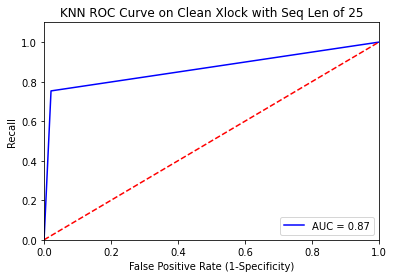

Test AUC: 0.866


---------------------Testing with 40% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------KNN on unclean data --------------------
Confusion Matrix: 
 [[4188   98]
 [  14   63]]

Testing Accuracy: 0.97
Precision:0.39
Recall: 0.82
False Positive Rate: 0.02

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4286
           1       0.39      0.82      0.53        77

    accuracy                           0.97      4363
   macro avg       0.69      0.90      0.76      4363
weighted avg       0.99      0.97      0.98      4363

AUC: 0.90


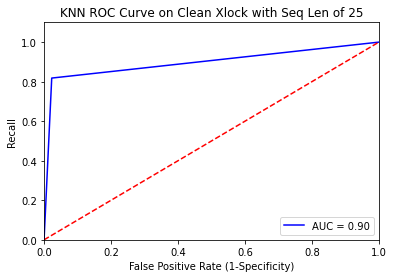

Test AUC: 0.898


---------------------Testing with 65% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------KNN on unclean data --------------------
Confusion Matrix: 
 [[4187   99]
 [  23   54]]

Testing Accuracy: 0.97
Precision:0.35
Recall: 0.70
False Positive Rate: 0.02

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4286
           1       0.35      0.70      0.47        77

    accuracy                           0.97      4363
   macro avg       0.67      0.84      0.73      4363
weighted avg       0.98      0.97      0.98      4363

AUC: 0.84


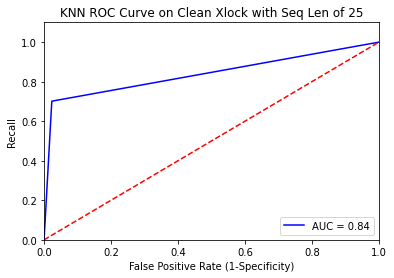

Test AUC: 0.839


---------------------Testing with 5% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------KNN on unclean data --------------------
Confusion Matrix: 
 [[4205   81]
 [  20   57]]

Testing Accuracy: 0.98
Precision:0.41
Recall: 0.74
False Positive Rate: 0.02

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4286
           1       0.41      0.74      0.53        77

    accuracy                           0.98      4363
   macro avg       0.70      0.86      0.76      4363
weighted avg       0.98      0.98      0.98      4363

AUC: 0.86


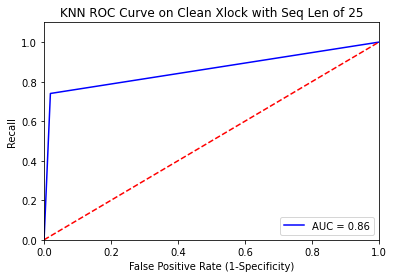

Test AUC: 0.861


---------------------Testing with 35% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------KNN on unclean data --------------------
Confusion Matrix: 
 [[4191   95]
 [  19   58]]

Testing Accuracy: 0.97
Precision:0.38
Recall: 0.75
False Positive Rate: 0.02

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4286
           1       0.38      0.75      0.50        77

    accuracy                           0.97      4363
   macro avg       0.69      0.87      0.75      4363
weighted avg       0.98      0.97      0.98      4363

AUC: 0.87


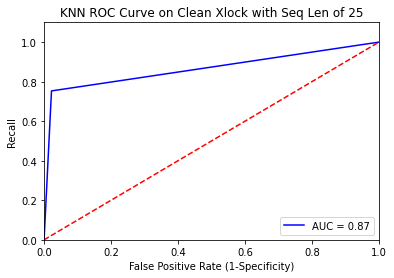

Test AUC: 0.866


---------------------Testing with 80% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------KNN on unclean data --------------------
Confusion Matrix: 
 [[4190   96]
 [  17   60]]

Testing Accuracy: 0.97
Precision:0.38
Recall: 0.78
False Positive Rate: 0.02

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4286
           1       0.38      0.78      0.52        77

    accuracy                           0.97      4363
   macro avg       0.69      0.88      0.75      4363
weighted avg       0.99      0.97      0.98      4363

AUC: 0.88


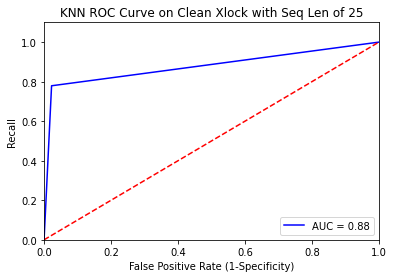

Test AUC: 0.878


---------------------Testing with 20% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------KNN on unclean data --------------------
Confusion Matrix: 
 [[4211   75]
 [  23   54]]

Testing Accuracy: 0.98
Precision:0.42
Recall: 0.70
False Positive Rate: 0.02

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4286
           1       0.42      0.70      0.52        77

    accuracy                           0.98      4363
   macro avg       0.71      0.84      0.76      4363
weighted avg       0.98      0.98      0.98      4363

AUC: 0.84


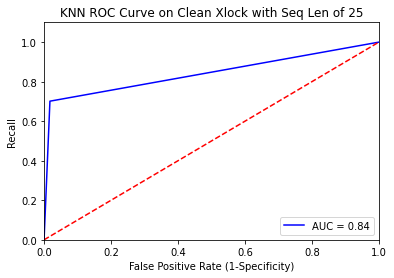

Test AUC: 0.842


---------------------Testing with 15% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------KNN on unclean data --------------------
Confusion Matrix: 
 [[4208   78]
 [  19   58]]

Testing Accuracy: 0.98
Precision:0.43
Recall: 0.75
False Positive Rate: 0.02

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4286
           1       0.43      0.75      0.54        77

    accuracy                           0.98      4363
   macro avg       0.71      0.87      0.77      4363
weighted avg       0.99      0.98      0.98      4363

AUC: 0.87


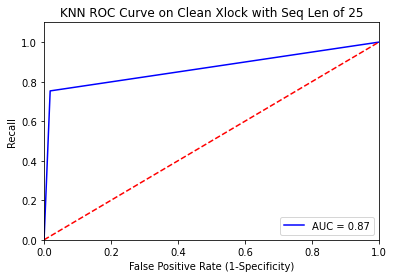

Test AUC: 0.868


---------------------Testing with 45% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------KNN on unclean data --------------------
Confusion Matrix: 
 [[4213   73]
 [  26   51]]

Testing Accuracy: 0.98
Precision:0.41
Recall: 0.66
False Positive Rate: 0.02

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4286
           1       0.41      0.66      0.51        77

    accuracy                           0.98      4363
   macro avg       0.70      0.82      0.75      4363
weighted avg       0.98      0.98      0.98      4363

AUC: 0.82


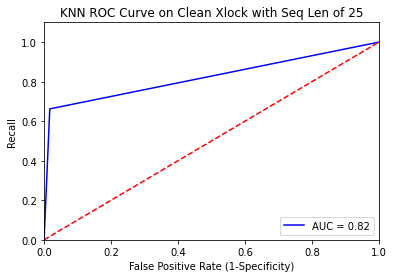

Test AUC: 0.823


---------------------Testing with 90% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------KNN on unclean data --------------------
Confusion Matrix: 
 [[4191   95]
 [  12   65]]

Testing Accuracy: 0.98
Precision:0.41
Recall: 0.84
False Positive Rate: 0.02

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4286
           1       0.41      0.84      0.55        77

    accuracy                           0.98      4363
   macro avg       0.70      0.91      0.77      4363
weighted avg       0.99      0.98      0.98      4363

AUC: 0.91


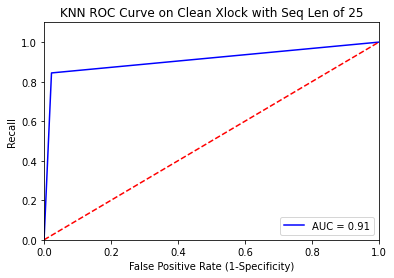

Test AUC: 0.911


---------------------Testing with 50% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------KNN on unclean data --------------------
Confusion Matrix: 
 [[4204   82]
 [  16   61]]

Testing Accuracy: 0.98
Precision:0.43
Recall: 0.79
False Positive Rate: 0.02

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4286
           1       0.43      0.79      0.55        77

    accuracy                           0.98      4363
   macro avg       0.71      0.89      0.77      4363
weighted avg       0.99      0.98      0.98      4363

AUC: 0.89


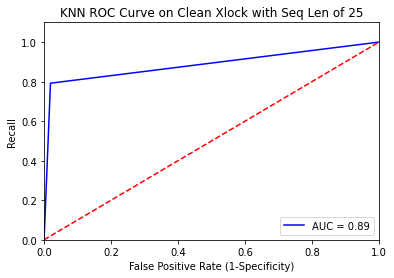

Test AUC: 0.887




In [ ]:
# Test with Duplication 
test_with_duplication(KNN, 'KNN')

# **Naive Bayes**

--------------------NB on clean data --------------------
Confusion Matrix: 
 [[3792  494]
 [  16   61]]

Testing Accuracy: 0.88
Precision:0.11
Recall: 0.79
False Positive Rate: 0.12

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      4286
           1       0.11      0.79      0.19        77

    accuracy                           0.88      4363
   macro avg       0.55      0.84      0.57      4363
weighted avg       0.98      0.88      0.92      4363

AUC: 0.84


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


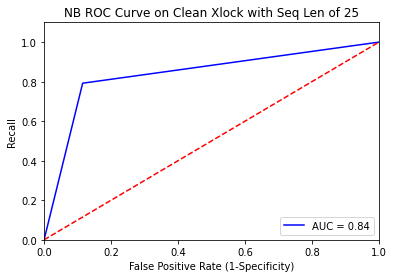

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Test AUC: 0.838



--------------------NB on unclean data --------------------
Confusion Matrix: 
 [[4018  523]
 [  32   86]]

Testing Accuracy: 0.88
Precision:0.14
Recall: 0.73
False Positive Rate: 0.12

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.94      4541
           1       0.14      0.73      0.24       118

    accuracy                           0.88      4659
   macro avg       0.57      0.81      0.59      4659
weighted avg       0.97      0.88      0.92      4659

AUC: 0.81


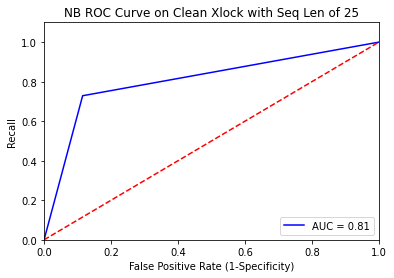

Test AUC: 0.807


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier and train with training set
NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train, y_train)

# Recording TPR and FPR for the TRAINING ROC curves
#y_pred = NaiveBayes.predict(x_train)
#NB_train = {}
#NB_train['fpr'], NB_train['tpr'], thresh = roc_curve(y_train, y_pred)
#NB_train['auc'] = roc_auc_score(y_train, y_pred)


## TESTING KNN with clean data and unclean data
NB_clean_perf   = test_model(test_clean,   y_test_clean,   NaiveBayes, 'NB', 'clean', dup_status=0); print('\n\n')
NB_unclean_perf = test_model(test_unclean, y_test_unclean, NaiveBayes, 'NB', 'unclean', dup_status= 101)


# Save performance to text file
write_to_file(NB_clean_perf, 'NB', 'clean')
write_to_file(NB_unclean_perf, 'NB', 'unclean')

---------------------Testing with 60% duplication---------------------
--------------------NB on unclean data --------------------
Confusion Matrix: 
 [[3768  518]
 [  10   67]]

Testing Accuracy: 0.88
Precision:0.11
Recall: 0.87
False Positive Rate: 0.12

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93      4286
           1       0.11      0.87      0.20        77

    accuracy                           0.88      4363
   macro avg       0.56      0.87      0.57      4363
weighted avg       0.98      0.88      0.92      4363

AUC: 0.87


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


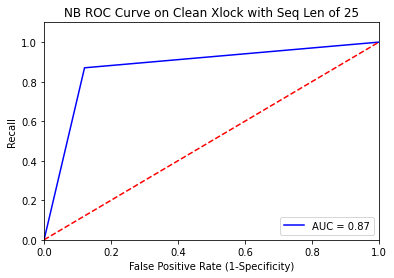

Test AUC: 0.875


---------------------Testing with 30% duplication---------------------
--------------------NB on unclean data --------------------
Confusion Matrix: 
 [[3795  491]
 [  12   65]]

Testing Accuracy: 0.88
Precision:0.12
Recall: 0.84
False Positive Rate: 0.11

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      4286
           1       0.12      0.84      0.21        77

    accuracy                           0.88      4363
   macro avg       0.56      0.86      0.57      4363
weighted avg       0.98      0.88      0.92      4363

AUC: 0.86


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


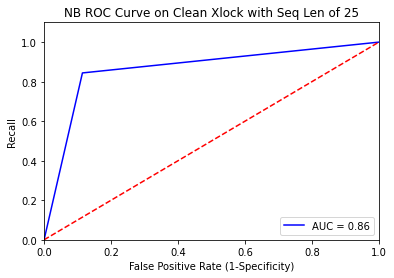

Test AUC: 0.865


---------------------Testing with 95% duplication---------------------
--------------------NB on unclean data --------------------
Confusion Matrix: 
 [[3680  606]
 [   0   77]]

Testing Accuracy: 0.86
Precision:0.11
Recall: 1.00
False Positive Rate: 0.14

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92      4286
           1       0.11      1.00      0.20        77

    accuracy                           0.86      4363
   macro avg       0.56      0.93      0.56      4363
weighted avg       0.98      0.86      0.91      4363

AUC: 0.93


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


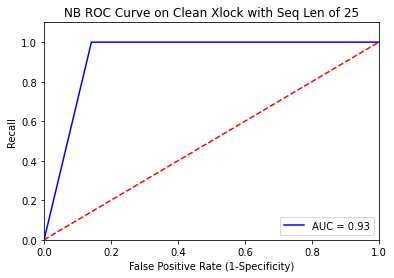

Test AUC: 0.929


---------------------Testing with 55% duplication---------------------
--------------------NB on unclean data --------------------
Confusion Matrix: 
 [[3802  484]
 [   4   73]]

Testing Accuracy: 0.89
Precision:0.13
Recall: 0.95
False Positive Rate: 0.11

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      4286
           1       0.13      0.95      0.23        77

    accuracy                           0.89      4363
   macro avg       0.57      0.92      0.58      4363
weighted avg       0.98      0.89      0.93      4363

AUC: 0.92


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


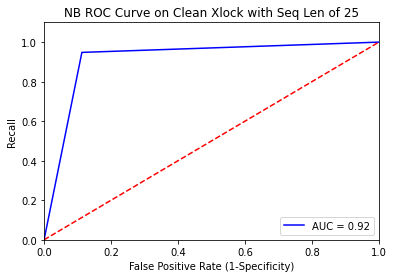

Test AUC: 0.918




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


---------------------Testing with 25% duplication---------------------
--------------------NB on unclean data --------------------
Confusion Matrix: 
 [[3797  489]
 [  20   57]]

Testing Accuracy: 0.88
Precision:0.10
Recall: 0.74
False Positive Rate: 0.11

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      4286
           1       0.10      0.74      0.18        77

    accuracy                           0.88      4363
   macro avg       0.55      0.81      0.56      4363
weighted avg       0.98      0.88      0.92      4363

AUC: 0.81


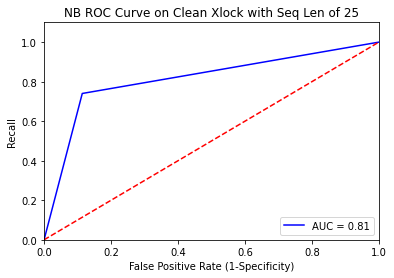

Test AUC: 0.813


---------------------Testing with 85% duplication---------------------
--------------------NB on unclean data --------------------
Confusion Matrix: 
 [[3782  504]
 [   7   70]]

Testing Accuracy: 0.88
Precision:0.12
Recall: 0.91
False Positive Rate: 0.12

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      4286
           1       0.12      0.91      0.22        77

    accuracy                           0.88      4363
   macro avg       0.56      0.90      0.58      4363
weighted avg       0.98      0.88      0.92      4363

AUC: 0.90


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


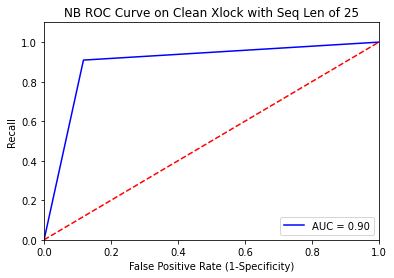

Test AUC: 0.896


---------------------Testing with 70% duplication---------------------
--------------------NB on unclean data --------------------
Confusion Matrix: 
 [[3803  483]
 [  16   61]]

Testing Accuracy: 0.89
Precision:0.11
Recall: 0.79
False Positive Rate: 0.11

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      4286
           1       0.11      0.79      0.20        77

    accuracy                           0.89      4363
   macro avg       0.55      0.84      0.57      4363
weighted avg       0.98      0.89      0.93      4363

AUC: 0.84


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


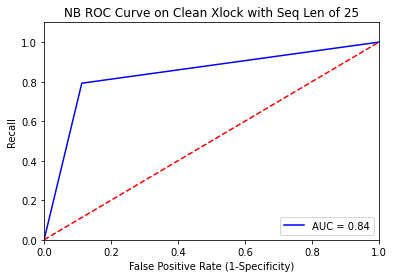

Test AUC: 0.840


---------------------Testing with 75% duplication---------------------
--------------------NB on unclean data --------------------
Confusion Matrix: 
 [[3825  461]
 [  12   65]]

Testing Accuracy: 0.89
Precision:0.12
Recall: 0.84
False Positive Rate: 0.11

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      4286
           1       0.12      0.84      0.22        77

    accuracy                           0.89      4363
   macro avg       0.56      0.87      0.58      4363
weighted avg       0.98      0.89      0.93      4363

AUC: 0.87


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


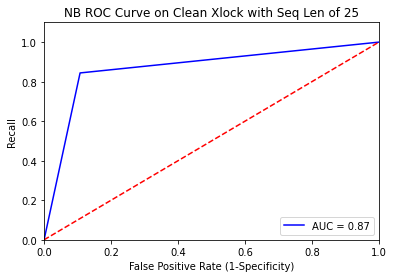

Test AUC: 0.868


---------------------Testing with 10% duplication---------------------
--------------------NB on unclean data --------------------
Confusion Matrix: 
 [[3797  489]
 [  15   62]]

Testing Accuracy: 0.88
Precision:0.11
Recall: 0.81
False Positive Rate: 0.11

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      4286
           1       0.11      0.81      0.20        77

    accuracy                           0.88      4363
   macro avg       0.55      0.85      0.57      4363
weighted avg       0.98      0.88      0.92      4363

AUC: 0.85


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


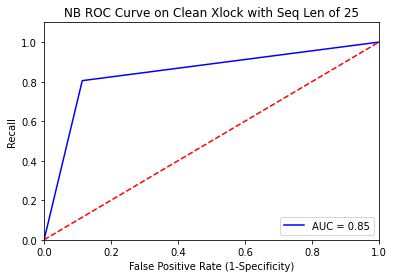

Test AUC: 0.846


---------------------Testing with 40% duplication---------------------
--------------------NB on unclean data --------------------
Confusion Matrix: 
 [[3797  489]
 [  14   63]]

Testing Accuracy: 0.88
Precision:0.11
Recall: 0.82
False Positive Rate: 0.11

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      4286
           1       0.11      0.82      0.20        77

    accuracy                           0.88      4363
   macro avg       0.56      0.85      0.57      4363
weighted avg       0.98      0.88      0.92      4363

AUC: 0.85


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


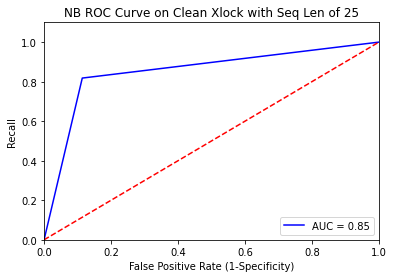

Test AUC: 0.852


---------------------Testing with 65% duplication---------------------
--------------------NB on unclean data --------------------
Confusion Matrix: 
 [[3719  567]
 [  13   64]]

Testing Accuracy: 0.87
Precision:0.10
Recall: 0.83
False Positive Rate: 0.13

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      4286
           1       0.10      0.83      0.18        77

    accuracy                           0.87      4363
   macro avg       0.55      0.85      0.55      4363
weighted avg       0.98      0.87      0.91      4363

AUC: 0.85


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


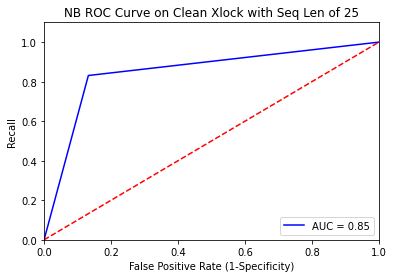

Test AUC: 0.849


---------------------Testing with 5% duplication---------------------
--------------------NB on unclean data --------------------
Confusion Matrix: 
 [[3788  498]
 [  17   60]]

Testing Accuracy: 0.88
Precision:0.11
Recall: 0.78
False Positive Rate: 0.12

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      4286
           1       0.11      0.78      0.19        77

    accuracy                           0.88      4363
   macro avg       0.55      0.83      0.56      4363
weighted avg       0.98      0.88      0.92      4363

AUC: 0.83


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


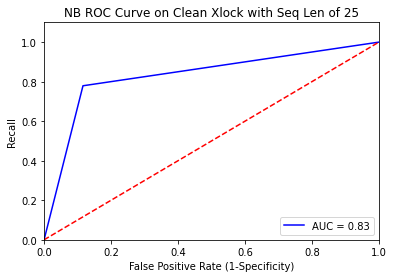

Test AUC: 0.832


---------------------Testing with 35% duplication---------------------
--------------------NB on unclean data --------------------
Confusion Matrix: 
 [[3753  533]
 [  15   62]]

Testing Accuracy: 0.87
Precision:0.10
Recall: 0.81
False Positive Rate: 0.12

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93      4286
           1       0.10      0.81      0.18        77

    accuracy                           0.87      4363
   macro avg       0.55      0.84      0.56      4363
weighted avg       0.98      0.87      0.92      4363

AUC: 0.84


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


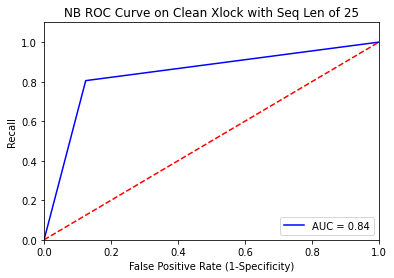

Test AUC: 0.840


---------------------Testing with 80% duplication---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


--------------------NB on unclean data --------------------
Confusion Matrix: 
 [[3860  426]
 [   3   74]]

Testing Accuracy: 0.90
Precision:0.15
Recall: 0.96
False Positive Rate: 0.10

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      4286
           1       0.15      0.96      0.26        77

    accuracy                           0.90      4363
   macro avg       0.57      0.93      0.60      4363
weighted avg       0.98      0.90      0.94      4363

AUC: 0.93


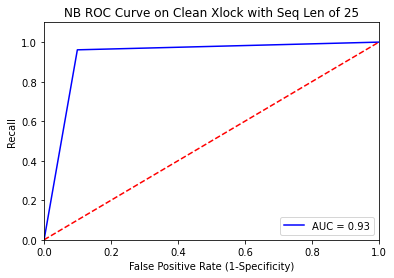

Test AUC: 0.931


---------------------Testing with 20% duplication---------------------
--------------------NB on unclean data --------------------
Confusion Matrix: 
 [[3773  513]
 [  18   59]]

Testing Accuracy: 0.88
Precision:0.10
Recall: 0.77
False Positive Rate: 0.12

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93      4286
           1       0.10      0.77      0.18        77

    accuracy                           0.88      4363
   macro avg       0.55      0.82      0.56      4363
weighted avg       0.98      0.88      0.92      4363

AUC: 0.82


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


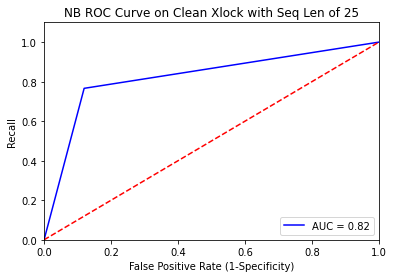

Test AUC: 0.823


---------------------Testing with 15% duplication---------------------
--------------------NB on unclean data --------------------
Confusion Matrix: 
 [[3806  480]
 [  16   61]]

Testing Accuracy: 0.89
Precision:0.11
Recall: 0.79
False Positive Rate: 0.11

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      4286
           1       0.11      0.79      0.20        77

    accuracy                           0.89      4363
   macro avg       0.55      0.84      0.57      4363
weighted avg       0.98      0.89      0.93      4363

AUC: 0.84


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


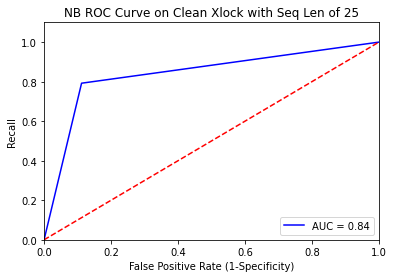

Test AUC: 0.840


---------------------Testing with 45% duplication---------------------
--------------------NB on unclean data --------------------
Confusion Matrix: 
 [[3823  463]
 [  23   54]]

Testing Accuracy: 0.89
Precision:0.10
Recall: 0.70
False Positive Rate: 0.11

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      4286
           1       0.10      0.70      0.18        77

    accuracy                           0.89      4363
   macro avg       0.55      0.80      0.56      4363
weighted avg       0.98      0.89      0.93      4363

AUC: 0.80


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


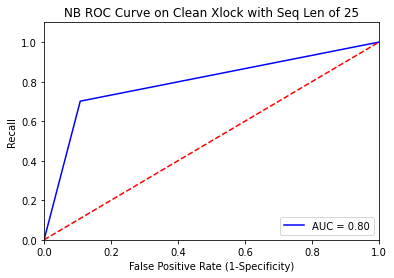

Test AUC: 0.797


---------------------Testing with 90% duplication---------------------
--------------------NB on unclean data --------------------
Confusion Matrix: 
 [[3759  527]
 [  12   65]]

Testing Accuracy: 0.88
Precision:0.11
Recall: 0.84
False Positive Rate: 0.12

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93      4286
           1       0.11      0.84      0.19        77

    accuracy                           0.88      4363
   macro avg       0.55      0.86      0.56      4363
weighted avg       0.98      0.88      0.92      4363

AUC: 0.86


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


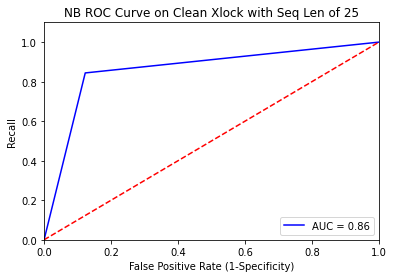

Test AUC: 0.861


---------------------Testing with 50% duplication---------------------
--------------------NB on unclean data --------------------
Confusion Matrix: 
 [[3726  560]
 [  14   63]]

Testing Accuracy: 0.87
Precision:0.10
Recall: 0.82
False Positive Rate: 0.13

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      4286
           1       0.10      0.82      0.18        77

    accuracy                           0.87      4363
   macro avg       0.55      0.84      0.55      4363
weighted avg       0.98      0.87      0.92      4363

AUC: 0.84


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


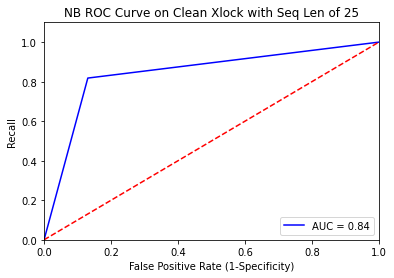

Test AUC: 0.844




In [ ]:
# Test with Duplication 
test_with_duplication(NaiveBayes, 'NB')

In [ ]:
# Save Model
save_models(NaiveBayes, 'NB')


#kmeans = pickle.load(open())

In [ ]:
# load the model from disk
def predict_from_saved_models(model_name):
  data_dir = 'saved_models/'
  loaded_model = pickle.load(open(data_dir+model_name, 'rb'))
  model_perf   = test_model(test_clean,   y_test_clean,   loaded_model, model_name, 'clean', dup_status=0);


#predict_from_saved_models('DT')



# **End**

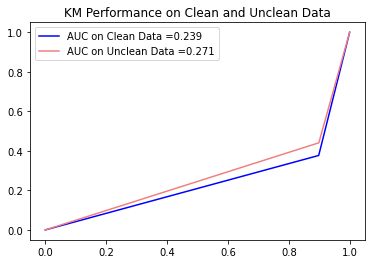

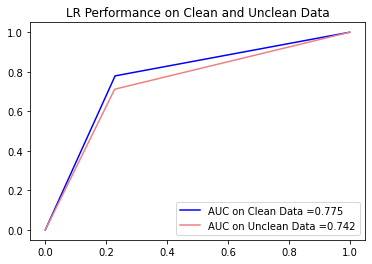

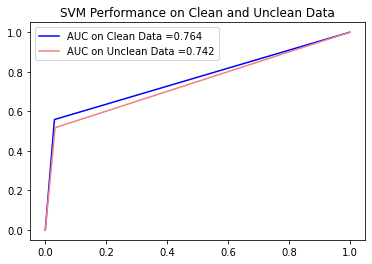

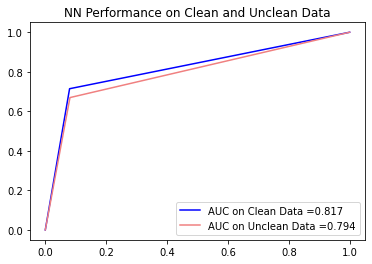

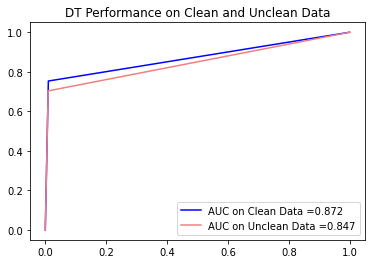

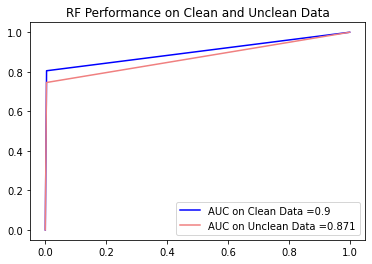

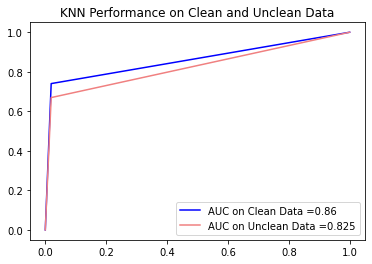

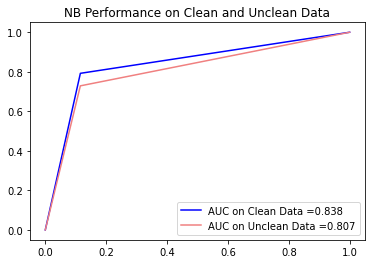

In [ ]:
def plot_ROC_Clean_Unclean(clean, unclean, model_name):
  colors = {'unclean': 'lightcoral','clean': 'blue'}

  plt.plot(clean.get('fpr'), clean.get('tpr'), color=colors.get('clean'),  label= "AUC on Clean Data =" + str( round(clean.get('auc'), 3) ) )   
  plt.plot(unclean.get('fpr'), unclean.get('tpr'), color=colors.get('unclean'),  label= "AUC on Unclean Data =" + str( round(unclean.get('auc'), 3) ) )   
  plt.title(model_name +' Performance on Clean and Unclean Data')
  plt.legend()
  plt.show()

plot_ROC_Clean_Unclean(KM_clean_perf, KM_unclean_perf, 'KM')
plot_ROC_Clean_Unclean(LR_clean_perf, LR_unclean_perf, 'LR')
plot_ROC_Clean_Unclean(SVM_clean_perf, SVM_unclean_perf, 'SVM')
plot_ROC_Clean_Unclean(NN_clean_perf, NN_unclean_perf, 'NN')
plot_ROC_Clean_Unclean(DT_clean_perf, DT_unclean_perf, 'DT')
plot_ROC_Clean_Unclean(RF_clean_perf, RF_unclean_perf, 'RF')
plot_ROC_Clean_Unclean(KNN_clean_perf, KNN_unclean_perf, 'KNN')
plot_ROC_Clean_Unclean(NB_clean_perf, NB_unclean_perf, 'NB')


# Graphing overlaid ROC curves, where each one represents a model AUC score
def graph_multi_ROC (DATA, SEQ_LEN, CLEAN ):
  # Set color for each model
  colors = {'KM': 'lightcoral','LR': 'darkorange', 'SVM':'lime', 'NB': 'steelblue',
            'NN': 'purple','DT': 'magenta','RF': 'deeppink','KNN': 'darkturquoise',
            'BERT': 'darkred', 'GPT': 'blue'}
  # Set marker for each model          
  markers = {'KM':'1--','LR': 'v--', 'SVM': '^--', 'NN': '*--', 'DT': 'o--', 'RF': '+--', 'KNN': '.--', 'NB': 'x--', 'BERT':'<--', 'GPT': '>--'}
  
  plt.figure(figsize=(9,6))

  plt.plot(KM_test.get('fpr'), KM_test.get('tpr'), markers.get('KM'), color=colors.get('KM'),  label="KM - AUC=" + str( round(KM_test.get('auc'), 3) ) )   
  plt.plot(LR_test.get('fpr'), LR_test.get('tpr'), markers.get('LR'), color=colors.get('LR'),  label="LR - AUC=" + str( round(LR_test.get('auc'),3) ) )
  plt.plot(SVM_test.get('fpr'),SVM_test.get('tpr'),markers.get('SVM'),color=colors.get('SVM'), label="SVM - AUC="+ str( round(SVM_test.get('auc'), 3) ) )
  plt.plot(NN_test.get('fpr'), NN_test.get('tpr'), markers.get('NN'), color=colors.get('NN'),  label="NN - AUC=" + str( round(NN_test.get('auc'), 3) ) )
  plt.plot(DT_test.get('fpr'), DT_test.get('tpr'), markers.get('DT'), color=colors.get('DT'),  label="DT - AUC=" + str( round(DT_test.get('auc'), 3) ) )
  plt.plot(RF_test.get('fpr'), RF_test.get('tpr'), markers.get('RF'), color=colors.get('RF'),  label="RF - AUC=" + str( round(RF_test.get('auc'), 3) ) )
  plt.plot(KNN_test.get('fpr'),KNN_test.get('tpr'),markers.get('KNN'),color=colors.get('KNN'), label="KNN - AUC="+ str( round(KNN_test.get('auc'), 3) ) )
  plt.plot(NB_test.get('fpr'), NB_test.get('tpr'), markers.get('NB'), color=colors.get('NB'),  label="NB - AUC=" + str( round(NB_test.get('auc'), 3) ) )
  try:
    plt.plot(BERT_test.get('fpr'),BERT_test.get('tpr'), markers.get('BERT'), color=colors.get('BERT'),  label="BERT - AUC="+ str(BERT_test.get('auc').round(3)))
    plt.plot(GPT_test.get('fpr'),GPT_test.get('tpr'), markers.get('GPT'), color=colors.get('GPT'),  label="GPT-2 - AUC="+ str(GPT_test.get('auc').round(3)))
  except NameError:
    print('\nBERT_test and GPT_test do not exist\n')

  plt.plot([0,1], [0,1], 'k--', label='Random Chances')
  plt.xlim([0.0,1.0])
  plt.ylim([0.0,1.02])
  plt.ylabel('Recall')
  plt.xlabel('False Positive Rate (1-Specificity)')
  plt.legend(loc='lower right') 
  plt.title( 'Testing ROCs %s on %s with seq len of %d' % (CLEAN, DATA, SEQ_LEN) )
  #plt.savefig(DATA_I+'-'+train_or_test+'.jpg', dpi = 80)
  plt.show()


# Func load_dict loads the dictionary contents extracted from the text file to a given variable name (stored in varname str)
# Output is a global dict variable 
# Input format:
## varname: a string of variable name
## dictvar: a dict containing the dictionary contents extracted from the text file
def load_dict(varname, dictvar):
  exec('%s = {}' %(varname), globals() )
  for key, value in dictvar.items():
    #print(key,":", value)
    exec('%s[%s] = %s' % (varname, key, value), globals())

# Func localFile extract the contents of each dictionary variables and load them into a dictionary
# Output: All the dictionaries from the text file will be loaded to the program
#  Input format: a text file containing multiple dictionaries, where each dict has this format:
## KM_test = {'fpr': array([0.        , 0.86136255, 1.        ]), 'tpr': array([0.        , 0.49007655, 1.        ]), 'auc': 0.31435699935689737}
## This function reads in each line, process the string and load it as a dict variable
## In the end, this function loads global variables based on each line of text
def load_dict_from_text (localFile):
  with open(localFile) as infile_object : 
    lines = infile_object.read().splitlines()    # Open and read each line
    measures = {}                                # stores elements of a dict
  for line in lines: 
    words = line.strip("\n ").split(' = ')     # remove whitespace and split str to get var name. words[0] contains var name, words[1] contains the phrase that goes after '='
    values = words[1].strip(" {} ").split('), ') # remove the whitespace and '{}', then split the second part of words to get each element in dict
    # iterate through each key-value pairelement and process them to get specific key-value pair
    for v in values:  
      elements = v.split(': ')                   # split key value pair by ':'. elements[0] is key, elements[1] is value
      elements[1] = elements[1].strip('array(')  # remove 'array(' from the value
      #print(elements[0]) print(elements[1])
      measures[ elements[0] ] = elements[1]      # save the key-value pairs found in a line into measures dict

    load_dict(words[0], measures)                # load the content of measures dict into the variable name stored in words[0]
        


In [ ]:
       
#fileName = 'MIT Live Lpr-pm.txt'
#load_dict_from_text(fileName)

clean_status = 'clean' if CLEAN else 'unclean'
graph_multi_ROC(DATA, SEQ_WINDOW, clean_status)

## **Note**

Synthetic Sendmail dataset contains some sequences with only 6 system calls. Therefore we padded on the right with -1 on these small sequences, so that the sequence length can be 15.
After cleaning, there are 2021 unique normal sequences, while there are 423 unique intrusion sequences. This dataset is imbalanced. 

BERT and GPT significantly outperform the rest of the models with AUC above 0.95, while the others perform poorly on this dataset (AUC around 0.5)


